In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
res = """1      1     17       -6.56      0.00    185.74           RANKING
   1      2     18       -6.56      0.00    185.74           RANKING
   1      3      4       -6.56      0.00    185.74           RANKING
   1      4      3       -6.56      0.01    185.74           RANKING
   1      5     12       -6.56      0.01    185.74           RANKING
   1      6     13       -6.56      0.07    185.72           RANKING
   1      7      9       -6.56      0.07    185.72           RANKING
   1      8      5       -6.56      0.07    185.72           RANKING
   1      9     10       -6.56      0.06    185.73           RANKING
   1     10     11       -6.56      0.06    185.73           RANKING
   1     11      8       -6.56      0.02    185.73           RANKING
   1     12     15       -6.56      0.06    185.73           RANKING
   1     13      7       -6.56      0.04    185.73           RANKING
   1     14      6       -6.56      0.05    185.73           RANKING
   1     15     20       -6.56      0.06    185.73           RANKING
   1     16     14       -6.56      0.09    185.72           RANKING
   1     17     16       -6.56      0.09    185.73           RANKING
   1     18     19       -6.56      0.11    185.68           RANKING
   1     19      1       -6.52      0.22    185.64           RANKING
   2      1      2       -6.13      0.00    170.95           RANKING"""

In [ ]:
res= res.split()

In [ ]:
res_dict = {}
res_dict["rank"] = [res[i] for i in range(0,len(res),7)]
res_dict["sub_rank"] = [res[i] for i in range(1,len(res),7)]
res_dict["run"] = [res[i] for i in range(2,len(res),7)]
res_dict["binding_energy"] = [res[i] for i in range(3,len(res),7)]
res_dict["cluster_RMSD"] = [res[i] for i in range(4,len(res),7)]
res_dict["reference_RMSD"] = [res[i] for i in range(5,len(res),7)]
res_dict["grep_pattern"] = [res[i] for i in range(6,len(res),7)]

In [ ]:
res_df = pd.DataFrame(res_dict)

In [ ]:
res_df.head()

,rank,sub_rank,run,binding_energy,cluster_RMSD,reference_RMSD,grep_pattern
0,1,1,17,-6.56,0.00,185.74,RANKING
1,1,2,18,-6.56,0.00,185.74,RANKING
2,1,3,4,-6.56,0.00,185.74,RANKING
3,1,4,3,-6.56,0.01,185.74,RANKING
4,1,5,12,-6.56,0.01,185.74,RANKING


In [ ]:
res_df.shape

(20, 7)

In [ ]:
res_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rank            20 non-null     object
 1   sub_rank        20 non-null     object
 2   run             20 non-null     object
 3   binding_energy  20 non-null     object
 4   cluster_RMSD    20 non-null     object
 5   reference_RMSD  20 non-null     object
 6   grep_pattern    20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [ ]:
res_df["rank"] = res_df["rank"].astype("int32")
res_df["sub_rank"] = res_df.sub_rank.astype("int32")
res_df["run"] = res_df.run.astype("int32")
res_df["binding_energy"] = res_df.binding_energy.astype("float32")
res_df["cluster_RMSD"] = res_df.cluster_RMSD.astype("float32")
res_df["reference_RMSD"] = res_df.reference_RMSD.astype("float32")

In [ ]:
res_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            20 non-null     int32  
 1   sub_rank        20 non-null     int32  
 2   run             20 non-null     int32  
 3   binding_energy  20 non-null     float32
 4   cluster_RMSD    20 non-null     float32
 5   reference_RMSD  20 non-null     float32
 6   grep_pattern    20 non-null     object 
dtypes: float32(3), int32(3), object(1)
memory usage: 768.0+ bytes


In [ ]:
res_df.head()

,rank,sub_rank,run,binding_energy,cluster_RMSD,reference_RMSD,grep_pattern
0,1,1,17,-6.56,0.00,185.740005,RANKING
1,1,2,18,-6.56,0.00,185.740005,RANKING
2,1,3,4,-6.56,0.00,185.740005,RANKING
3,1,4,3,-6.56,0.01,185.740005,RANKING
4,1,5,12,-6.56,0.01,185.740005,RANKING


In [ ]:
df = res_df.drop(columns = ["rank", "sub_rank", "run"])

In [ ]:
df.describe()

,binding_energy,cluster_RMSD,reference_RMSD
count,20.000000,20.000000,20.000000
mean,-6.536499,0.054500,184.984482
std,0.096096,0.051858,3.303464
min,-6.560000,0.000000,170.949997
25%,-6.560000,0.010000,185.720001
50%,-6.560000,0.060000,185.729996
75%,-6.560000,0.070000,185.732498
max,-6.130000,0.220000,185.740005


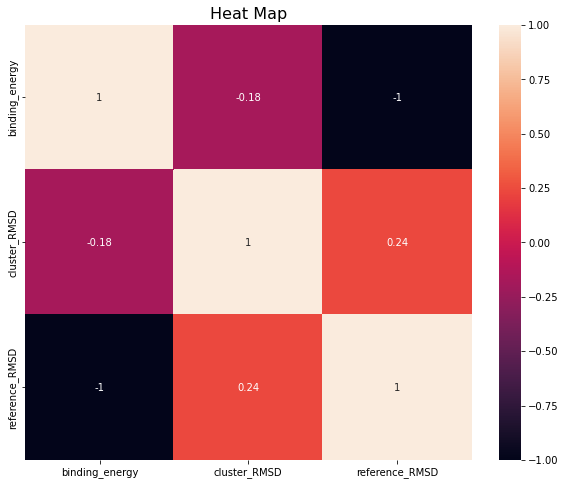

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True).set_title('Correlation Matrix', fontsize =16)
plt.show()

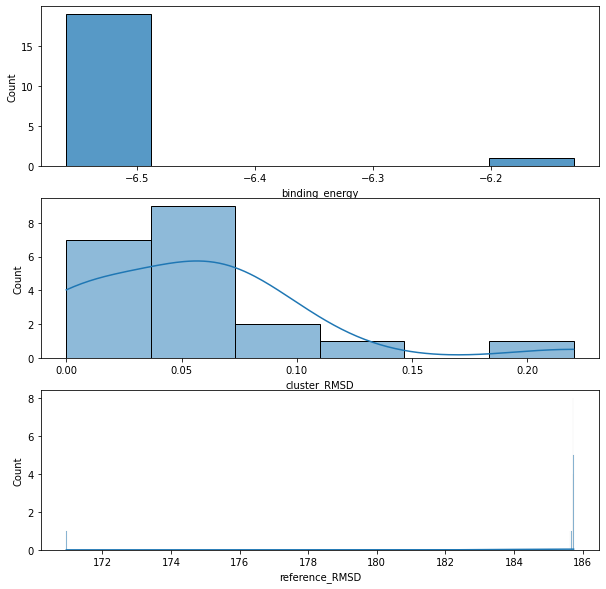

In [ ]:
fig, ax = plt.subplots(3, figsize = (10,10))
sns.histplot(x = "binding_energy", data=df, ax= ax[0])
sns.histplot(x = "cluster_RMSD", data=df, ax = ax[1],  kde = True)
sns.histplot(x = "reference_RMSD", data=df, ax = ax[2], kde = True)
plt.show()

#Docking_Result

In [ ]:
"""          AutoDock 4.2 Release 4.2.6   
         (C) 1989-2012 The Scripps Research Institute
        AutoDock comes with ABSOLUTELY NO WARRANTY.
        AutoDock is free software, and you are welcome
        to redistribute it under certain conditions;
        for details type 'autodock4 -C'

                     main.cc  $Revision: 1.213 $

                   Compiled on Jul 18 2014 at 15:34:58


This file was created at:			0:50 52" a.m., 04/24/2022
                   on host:		"LAPTOP-6QPHUEE2"
Current Working Directory = "C:\Users\Andy\Desktop\Docking"

      ________________________________________________________________

                   SETTING UP DEFAULT PARAMETER LIBRARY
      ________________________________________________________________


Random number generator was seeded with values 10060, 1650741652.
Docking parameter file (DPF) used for this docking:		docking.dpf
DPF> autodock_parameter_version 4.2       # used by autodock to validate parameter set

	Autodock parameter version 4.2.
DPF> outlev 1                             # diagnostic output level

Output Level = 1  ADT-COMPATIBLE OUTPUT DURING DOCKING.
DPF> intelec                              # calculate internal electrostatics

Electrostatic energies will be calculated for all non-bonds between moving atoms.
DPF> seed pid time                        # seeds for random generator

Random number generator was seeded with values 10060, 1650741652.
DPF> ligand_types A NA SA                 # atoms types in ligand

DPF> fld 7bw4_clean_chainA.maps.fld       # grid_data_file

Opening Grid Map Dimensions file:		7bw4_clean_chainA.maps.fld
Grid Point Spacing =				0.375 Angstroms

Even Number of User-specified Grid Points =	100 x-points
						108 y-points
						126 z-points

Coordinates of Central Grid Point of Maps =	(103.570, 104.351, 101.964)
Macromolecule file used to create Grid Maps =	7bw4_clean_chainA.pdbqt
Grid Parameter file used to create Grid Maps =	gridoutput.gpf
Minimum coordinates in grid = (84.820, 84.101, 78.339)
Maximum coordinates in grid = (122.320, 124.601, 125.589)

DPF> map 7bw4_clean_chainA.A.map          # atom-specific affinity map

DPF> map 7bw4_clean_chainA.NA.map         # atom-specific affinity map

DPF> map 7bw4_clean_chainA.SA.map         # atom-specific affinity map

DPF> elecmap 7bw4_clean_chainA.e.map      # electrostatics map

DPF> desolvmap 7bw4_clean_chainA.d.map    # desolvation map

DPF> move DB11496.pdbqt                   # small molecule

1,4-interactions will be _ignored_ in the non-bonded internal energy calculation.

Ligand PDBQT file = "DB11496.pdbqt"

INPUT LIGAND PDBQT FILE:
________________________

INPUT-LIGAND-PDBQT: REMARK  0 active torsions:
INPUT-LIGAND-PDBQT: REMARK  status: ('A' for Active; 'I' for Inactive)
INPUT-LIGAND-PDBQT: ROOT
INPUT-LIGAND-PDBQT: HETATM    1  S   UNK     0      -2.565   3.364   0.000  0.00  0.00    -0.050 SA
INPUT-LIGAND-PDBQT: HETATM    2  C   UNK     0      -3.005   1.889   0.000  0.00  0.00     0.165 A 
INPUT-LIGAND-PDBQT: HETATM    3  N   UNK     0      -2.069   0.665   0.000  0.00  0.00    -0.232 NA
INPUT-LIGAND-PDBQT: HETATM    4  C   UNK     0      -2.944  -0.603   0.000  0.00  0.00     0.062 A 
INPUT-LIGAND-PDBQT: HETATM    5  C   UNK     0      -2.587  -2.101   0.000  0.00  0.00     0.046 A 
INPUT-LIGAND-PDBQT: HETATM    6  C   UNK     0      -3.706  -3.159   0.000  0.00  0.00     0.007 A 
INPUT-LIGAND-PDBQT: HETATM    7  C   UNK     0      -5.181  -2.719   0.000  0.00  0.00     0.006 A 
INPUT-LIGAND-PDBQT: HETATM    8  C   UNK     0      -5.538  -1.221   0.000  0.00  0.00     0.034 A 
INPUT-LIGAND-PDBQT: HETATM    9  C   UNK     0      -4.420  -0.163   0.000  0.00  0.00     0.023 A 
INPUT-LIGAND-PDBQT: HETATM   10  S   UNK     0      -4.457   1.377   0.000  0.00  0.00    -0.060 SA
INPUT-LIGAND-PDBQT: ENDROOT
INPUT-LIGAND-PDBQT: TORSDOF 0
________________________________________________________________________________

Total charge on ligand                               =	+0.001 e
REMARK  0 active torsions:
REMARK  status: ('A' for Active; 'I' for Inactive)

*** No Rotatable Bonds detected in Small Molecule. ***

Number of atoms in ligand:  10

Number of non-hydrogen atoms in ligand:  10

Number of vibrational degrees of freedom of ligand:  24


Number of torsional degrees of freedom = 0
Estimated loss of torsional free energy upon binding = +0.0000 kcal/mol


DPF> about -3.647 -0.267 0.000            # small molecule center

Small molecule center of rotation =	(-3.647, -0.267, +0.000)

DPF> tran0 random                         # initial coordinates/A or random

Initial translation =			(114.575, 112.092, 80.480) Angstroms
DPF> quaternion0 random                   # initial orientation

Each run will begin with a new, random initial orientation.
Initial quaternion,  (x,y,z,w) =	( 0.154, 0.709, 0.097, 0.681 ),
DPF> dihe0 random                         # initial dihedrals (relative) or random

DPF> torsdof 0                            # torsional degrees of freedom

Number of torsional degrees of freedom = 0
Free energy coefficient for torsional degrees of freedom = 0.2983, the factory default value.

Estimated loss of torsional free energy upon binding = +0.0000 kcal/mol

DPF> rmstol 2.0                           # cluster_tolerance/A

Maximum RMS tolerance for conformational cluster analysis = 2.00 Angstroms
DPF> extnrg 1000.0                        # external grid energy

External grid energy (beyond grid map walls) = 1000.00

DPF> e0max 0.0 10000                      # max initial energy; max number of retries

Using user-specified maximum number of retries for simanneal initialization, 10000 retries.
If the simanneal initial energy is greater than e0max, 0.000,
then a new, random initial state will be created.

DPF> ga_pop_size 150                      # number of individuals in population

A population of 150 individuals will be used
DPF> ga_num_evals 25000000                # maximum number of energy evaluations

There will be at most 25000000 function evaluations used.
DPF> ga_num_generations 27000             # maximum number of generations

The GA will run for at most 27000 generations.
DPF> ga_elitism 1                         # number of top individuals to survive to next generation

The 1 best will be preserved each GA generation.
DPF> ga_mutation_rate 0.02                # rate of gene mutation

The mutation rate is 0.020000.
DPF> ga_crossover_rate 0.8                # rate of crossover

The crossover rate is 0.800000.
DPF> ga_window_size 10                    # 

The GA's selection window is 10 generations.
DPF> ga_cauchy_alpha 0.0                  # Alpha parameter of Cauchy distribution

The alpha parameter (for the Cauchy distribution) is being set to 0.000000.
DPF> ga_cauchy_beta 1.0                   # Beta parameter Cauchy distribution

The beta parameter (for the Cauchy distribution) is being set to 1.000000.
DPF> set_ga                               # set the above parameters for GA or LGA

DPF> sw_max_its 300                       # iterations of Solis & Wets local search

Solis & Wets algorithms will perform at most 300 iterations.
DPF> sw_max_succ 4                        # consecutive successes before changing rho

Solis & Wets algorithms expand rho every 4 in a row successes.
DPF> sw_max_fail 4                        # consecutive failures before changing rho

Solis & Wets algorithms contract rho every 4 in a row failures.
DPF> sw_rho 1.0                           # size of local search space to sample

rho is set to 1.000000.
DPF> sw_lb_rho 0.01                       # lower bound on rho

rho will never get smaller than 0.010000.
DPF> ls_search_freq 0.06                  # probability of performing local search on individual

Local search will be performed with frequency 0.060000.
DPF> set_psw1                             # set the above pseudo-Solis & Wets parameters

Creating a new Local Search object using the pseudo-Solis-Wets algorithm (pSW1) with the current settings.

DPF> unbound_model bound                  # state of unbound ligand

DPF> ga_run 20                            # do this many hybrid GA-LS runs

centering ligand on specified point: -3.647 -0.267 0.000
Furthest true ligand atom from "about" center is 3.789 Angstroms (maxrad).
Number of requested GA dockings = 20 runs
Unbound model to be used is 'same as bound' [AutoDock 4.2 default].

	BEGINNING GENETIC ALGORITHM DOCKING 1 of 20
Run: 1 Seed: 1512921322 1464567990 [ Run 1 of 20 GA/GALS ]
Beginning LAMARCKIAN GENETIC ALGORITHM (LGA), with a maximum of 25000000 energy evaluations.

Final-Value: -6.517


	FINAL GENETIC ALGORITHM DOCKED STATE
	_______________________________________________


Detailed state:  trans 111.891 102.274 106.090 quatxyzw 0.339023 0.084212 -0.570542 0.743272 center -3.647 -0.267 0.000 ntor 0
State:	111.891 102.274 106.090   0.507  0.126 -0.853 83.978  

DOCKED: MODEL        1
DOCKED: USER    Run = 1
DOCKED: USER    DPF = docking.dpf
DOCKED: USER  
DOCKED: USER    Estimated Free Energy of Binding    =   -6.52 kcal/mol  [=(1)+(2)+(3)-(4)]
DOCKED: USER    Estimated Inhibition Constant, Ki   =   16.72 uM (micromolar)  [Temperature = 298.15 K]
DOCKED: USER    
DOCKED: USER    (1) Final Intermolecular Energy     =   -6.52 kcal/mol
DOCKED: USER        vdW + Hbond + desolv Energy     =   -6.52 kcal/mol
DOCKED: USER        Electrostatic Energy            =   +0.00 kcal/mol
DOCKED: USER    (2) Final Total Internal Energy     =   +0.00 kcal/mol
DOCKED: USER    (3) Torsional Free Energy           =   +0.00 kcal/mol
DOCKED: USER    (4) Unbound System's Energy  [=(2)] =   +0.00 kcal/mol
DOCKED: USER    
DOCKED: USER    
DOCKED: USER    NEWDPF move DB11496.pdbqt
DOCKED: USER    NEWDPF about -3.647000 -0.267000 0.000000
DOCKED: USER    NEWDPF tran0 111.891110 102.273689 106.090253
DOCKED: USER    NEWDPF quaternion0 0.339023 0.084212 -0.570542 0.743272
DOCKED: USER    NEWDPF axisangle0 0.506769 0.125880 -0.852842 83.978228
DOCKED: USER    NEWDPF quat0 0.506769 0.125880 -0.852842 83.978228
DOCKED: USER  keepresnum = 1 
DOCKED: USER  
DOCKED: REMARK  0 active torsions:
DOCKED: REMARK  status: ('A' for Active; 'I' for Inactive)
DOCKED: USER                              x       y       z     vdW  Elec       q    Type
DOCKED: USER                           _______ _______ _______ _____ _____    ______ ____
DOCKED: ROOT
DOCKED: ATOM      1  S   UNK     0     109.381 103.686 103.628 -1.01 +0.01    -0.050 SA
DOCKED: ATOM      2  C   UNK     0     110.401 103.112 104.629 -0.59 -0.00    +0.165 A 
DOCKED: ATOM      3  N   UNK     0     111.682 103.813 105.118 -0.25 -0.01    -0.232 NA
DOCKED: ATOM      4  C   UNK     0     112.392 102.870 106.108 -0.58 +0.00    +0.062 A 
DOCKED: ATOM      5  C   UNK     0     113.697 103.015 106.913 -0.62 +0.00    +0.046 A 
DOCKED: ATOM      6  C   UNK     0     114.159 101.876 107.841 -0.67 +0.00    +0.007 A 
DOCKED: ATOM      7  C   UNK     0     113.317 100.593 107.963 -0.64 -0.00    +0.006 A 
DOCKED: ATOM      8  C   UNK     0     112.013 100.448 107.158 -0.71 -0.00    +0.034 A 
DOCKED: ATOM      9  C   UNK     0     111.550 101.586 106.230 -0.65 -0.00    +0.023 A 
DOCKED: ATOM     10  S   UNK     0     110.319 101.736 105.316 -0.80 +0.01    -0.060 SA
DOCKED: ENDROOT
DOCKED: TORSDOF 0
DOCKED: TER
DOCKED: ENDMDL
________________________________________________________________________________


	BEGINNING GENETIC ALGORITHM DOCKING 2 of 20
Run: 2 Seed: 1703958539 1484204995 [ Run 2 of 20 GA/GALS ]
Beginning LAMARCKIAN GENETIC ALGORITHM (LGA), with a maximum of 25000000 energy evaluations.

Final-Value: -6.127


	FINAL GENETIC ALGORITHM DOCKED STATE
	_______________________________________________


Detailed state:  trans 111.096 97.491 84.466 quatxyzw -0.680497 -0.672571 -0.035037 0.288695 center -3.647 -0.267 0.000 ntor 0
State:	111.096  97.491  84.466  -0.711 -0.702 -0.037 146.440  

DOCKED: MODEL        2
DOCKED: USER    Run = 2
DOCKED: USER    DPF = docking.dpf
DOCKED: USER  
DOCKED: USER    Estimated Free Energy of Binding    =   -6.13 kcal/mol  [=(1)+(2)+(3)-(4)]
DOCKED: USER    Estimated Inhibition Constant, Ki   =   32.29 uM (micromolar)  [Temperature = 298.15 K]
DOCKED: USER    
DOCKED: USER    (1) Final Intermolecular Energy     =   -6.13 kcal/mol
DOCKED: USER        vdW + Hbond + desolv Energy     =   -6.09 kcal/mol
DOCKED: USER        Electrostatic Energy            =   -0.04 kcal/mol
DOCKED: USER    (2) Final Total Internal Energy     =   +0.00 kcal/mol
DOCKED: USER    (3) Torsional Free Energy           =   +0.00 kcal/mol
DOCKED: USER    (4) Unbound System's Energy  [=(2)] =   +0.00 kcal/mol
DOCKED: USER    
DOCKED: USER    
DOCKED: USER    NEWDPF move DB11496.pdbqt
DOCKED: USER    NEWDPF about -3.647000 -0.267000 0.000000
DOCKED: USER    NEWDPF tran0 111.095816 97.491258 84.466465
DOCKED: USER    NEWDPF quaternion0 -0.680497 -0.672571 -0.035037 0.288695
DOCKED: USER    NEWDPF axisangle0 -0.710760 -0.702482 -0.036595 146.440364
DOCKED: USER    NEWDPF quat0 -0.710760 -0.702482 -0.036595 146.440364
DOCKED: USER  keepresnum = 1 
DOCKED: USER  
DOCKED: REMARK  0 active torsions:
DOCKED: REMARK  status: ('A' for Active; 'I' for Inactive)
DOCKED: USER                              x       y       z     vdW  Elec       q    Type
DOCKED: USER                           _______ _______ _______ _____ _____    ______ ____
DOCKED: ROOT
DOCKED: ATOM      1  S   UNK     0     114.447  98.763  85.696 -1.00 -0.01    -0.050 SA
DOCKED: ATOM      2  C   UNK     0     113.085  98.246  85.196 -0.48 +0.05    +0.165 A 
DOCKED: ATOM      3  N   UNK     0     112.077  99.034  84.339 -0.37 -0.08    -0.232 NA
DOCKED: ATOM      4  C   UNK     0     110.860  98.125  84.079 -0.51 +0.01    +0.062 A 
DOCKED: ATOM      5  C   UNK     0     109.553  98.352  83.298 -0.51 -0.00    +0.046 A 
DOCKED: ATOM      6  C   UNK     0     108.502  97.230  83.214 -0.53 -0.00    +0.007 A 
DOCKED: ATOM      7  C   UNK     0     108.759  95.881  83.910 -0.68 -0.00    +0.006 A 
DOCKED: ATOM      8  C   UNK     0     110.066  95.654  84.691 -0.58 +0.00    +0.034 A 
DOCKED: ATOM      9  C   UNK     0     111.117  96.775  84.776 -0.58 +0.00    +0.023 A 
DOCKED: ATOM     10  S   UNK     0     112.492  96.851  85.466 -0.85 -0.01    -0.060 SA
DOCKED: ENDROOT
DOCKED: TORSDOF 0
DOCKED: TER
DOCKED: ENDMDL
________________________________________________________________________________


	BEGINNING GENETIC ALGORITHM DOCKING 3 of 20
Run: 3 Seed: 97327959 72931470 [ Run 3 of 20 GA/GALS ]
Beginning LAMARCKIAN GENETIC ALGORITHM (LGA), with a maximum of 25000000 energy evaluations.

Final-Value: -6.564


	FINAL GENETIC ALGORITHM DOCKED STATE
	_______________________________________________


Detailed state:  trans 111.956 102.208 106.247 quatxyzw 0.366916 0.031578 -0.550378 0.749306 center -3.647 -0.267 0.000 ntor 0
State:	111.956 102.208 106.247   0.554  0.048 -0.831 82.939  

DOCKED: MODEL        3
DOCKED: USER    Run = 3
DOCKED: USER    DPF = docking.dpf
DOCKED: USER  
DOCKED: USER    Estimated Free Energy of Binding    =   -6.56 kcal/mol  [=(1)+(2)+(3)-(4)]
DOCKED: USER    Estimated Inhibition Constant, Ki   =   15.44 uM (micromolar)  [Temperature = 298.15 K]
DOCKED: USER    
DOCKED: USER    (1) Final Intermolecular Energy     =   -6.56 kcal/mol
DOCKED: USER        vdW + Hbond + desolv Energy     =   -6.56 kcal/mol
DOCKED: USER        Electrostatic Energy            =   +0.00 kcal/mol
DOCKED: USER    (2) Final Total Internal Energy     =   +0.00 kcal/mol
DOCKED: USER    (3) Torsional Free Energy           =   +0.00 kcal/mol
DOCKED: USER    (4) Unbound System's Energy  [=(2)] =   +0.00 kcal/mol
DOCKED: USER    
DOCKED: USER    
DOCKED: USER    NEWDPF move DB11496.pdbqt
DOCKED: USER    NEWDPF about -3.647000 -0.267000 0.000000
DOCKED: USER    NEWDPF tran0 111.955706 102.208145 106.247009
DOCKED: USER    NEWDPF quaternion0 0.366916 0.031578 -0.550378 0.749306
DOCKED: USER    NEWDPF axisangle0 0.554066 0.047685 -0.831106 82.939415
DOCKED: USER    NEWDPF quat0 0.554066 0.047685 -0.831106 82.939415
DOCKED: USER  keepresnum = 1 
DOCKED: USER  
DOCKED: REMARK  0 active torsions:
DOCKED: REMARK  status: ('A' for Active; 'I' for Inactive)
DOCKED: USER                              x       y       z     vdW  Elec       q    Type
DOCKED: USER                           _______ _______ _______ _____ _____    ______ ____
DOCKED: ROOT
DOCKED: ATOM      1  S   UNK     0     109.469 103.579 103.738 -1.01 +0.01    -0.050 SA
DOCKED: ATOM      2  C   UNK     0     110.479 103.022 104.758 -0.58 -0.00    +0.165 A 
DOCKED: ATOM      3  N   UNK     0     111.827 103.663 105.139 -0.35 -0.01    -0.232 NA
DOCKED: ATOM      4  C   UNK     0     112.501 102.762 106.193 -0.58 +0.00    +0.062 A 
DOCKED: ATOM      5  C   UNK     0     113.842 102.878 106.941 -0.63 +0.00    +0.046 A 
DOCKED: ATOM      6  C   UNK     0     114.251 101.797 107.959 -0.66 -0.00    +0.007 A 
DOCKED: ATOM      7  C   UNK     0     113.320 100.601 108.227 -0.63 -0.00    +0.006 A 
DOCKED: ATOM      8  C   UNK     0     111.979 100.485 107.479 -0.69 -0.00    +0.034 A 
DOCKED: ATOM      9  C   UNK     0     111.569 101.566 106.462 -0.64 -0.00    +0.023 A 
DOCKED: ATOM     10  S   UNK     0     110.320 101.727 105.575 -0.81 +0.01    -0.060 SA
DOCKED: ENDROOT
DOCKED: TORSDOF 0
DOCKED: TER
DOCKED: ENDMDL
________________________________________________________________________________


	BEGINNING GENETIC ALGORITHM DOCKING 4 of 20
Run: 4 Seed: 1016133058 48353332 [ Run 4 of 20 GA/GALS ]
Beginning LAMARCKIAN GENETIC ALGORITHM (LGA), with a maximum of 25000000 energy evaluations.

Final-Value: -6.564


	FINAL GENETIC ALGORITHM DOCKED STATE
	_______________________________________________


Detailed state:  trans 111.953 102.210 106.248 quatxyzw 0.365556 0.033414 -0.551461 0.749095 center -3.647 -0.267 0.000 ntor 0
State:	111.953 102.210 106.248   0.552  0.050 -0.832 82.976  

DOCKED: MODEL        4
DOCKED: USER    Run = 4
DOCKED: USER    DPF = docking.dpf
DOCKED: USER  
DOCKED: USER    Estimated Free Energy of Binding    =   -6.56 kcal/mol  [=(1)+(2)+(3)-(4)]
DOCKED: USER    Estimated Inhibition Constant, Ki   =   15.43 uM (micromolar)  [Temperature = 298.15 K]
DOCKED: USER    
DOCKED: USER    (1) Final Intermolecular Energy     =   -6.56 kcal/mol
DOCKED: USER        vdW + Hbond + desolv Energy     =   -6.57 kcal/mol
DOCKED: USER        Electrostatic Energy            =   +0.00 kcal/mol
DOCKED: USER    (2) Final Total Internal Energy     =   +0.00 kcal/mol
DOCKED: USER    (3) Torsional Free Energy           =   +0.00 kcal/mol
DOCKED: USER    (4) Unbound System's Energy  [=(2)] =   +0.00 kcal/mol
DOCKED: USER    
DOCKED: USER    
DOCKED: USER    NEWDPF move DB11496.pdbqt
DOCKED: USER    NEWDPF about -3.647000 -0.267000 0.000000
DOCKED: USER    NEWDPF tran0 111.952712 102.209646 106.248127
DOCKED: USER    NEWDPF quaternion0 0.365556 0.033414 -0.551461 0.749095
DOCKED: USER    NEWDPF axisangle0 0.551814 0.050439 -0.832441 82.975854
DOCKED: USER    NEWDPF quat0 0.551814 0.050439 -0.832441 82.975854
DOCKED: USER  keepresnum = 1 
DOCKED: USER  
DOCKED: REMARK  0 active torsions:
DOCKED: REMARK  status: ('A' for Active; 'I' for Inactive)
DOCKED: USER                              x       y       z     vdW  Elec       q    Type
DOCKED: USER                           _______ _______ _______ _____ _____    ______ ____
DOCKED: ROOT
DOCKED: ATOM      1  S   UNK     0     109.463 103.582 103.744 -1.01 +0.01    -0.050 SA
DOCKED: ATOM      2  C   UNK     0     110.474 103.024 104.761 -0.58 -0.00    +0.165 A 
DOCKED: ATOM      3  N   UNK     0     111.820 103.668 105.146 -0.35 -0.01    -0.232 NA
DOCKED: ATOM      4  C   UNK     0     112.496 102.766 106.196 -0.58 +0.00    +0.062 A 
DOCKED: ATOM      5  C   UNK     0     113.836 102.883 106.946 -0.63 +0.00    +0.046 A 
DOCKED: ATOM      6  C   UNK     0     114.248 101.799 107.959 -0.66 -0.00    +0.007 A 
DOCKED: ATOM      7  C   UNK     0     113.321 100.599 108.223 -0.63 -0.00    +0.006 A 
DOCKED: ATOM      8  C   UNK     0     111.981 100.482 107.474 -0.69 -0.00    +0.034 A 
DOCKED: ATOM      9  C   UNK     0     111.568 101.565 106.460 -0.64 -0.00    +0.023 A 
DOCKED: ATOM     10  S   UNK     0     110.319 101.725 105.573 -0.81 +0.01    -0.060 SA
DOCKED: ENDROOT
DOCKED: TORSDOF 0
DOCKED: TER
DOCKED: ENDMDL
________________________________________________________________________________


	BEGINNING GENETIC ALGORITHM DOCKING 5 of 20
Run: 5 Seed: 1230777669 1202259215 [ Run 5 of 20 GA/GALS ]
Beginning LAMARCKIAN GENETIC ALGORITHM (LGA), with a maximum of 25000000 energy evaluations.

Final-Value: -6.563


	FINAL GENETIC ALGORITHM DOCKED STATE
	_______________________________________________


Detailed state:  trans 111.976 102.181 106.227 quatxyzw -0.374993 -0.013631 0.542765 -0.751399 center -3.647 -0.267 0.000 ntor 0
State:	111.976 102.181 106.227  -0.568 -0.021  0.823 -82.577  

DOCKED: MODEL        5
DOCKED: USER    Run = 5
DOCKED: USER    DPF = docking.dpf
DOCKED: USER  
DOCKED: USER    Estimated Free Energy of Binding    =   -6.56 kcal/mol  [=(1)+(2)+(3)-(4)]
DOCKED: USER    Estimated Inhibition Constant, Ki   =   15.46 uM (micromolar)  [Temperature = 298.15 K]
DOCKED: USER    
DOCKED: USER    (1) Final Intermolecular Energy     =   -6.56 kcal/mol
DOCKED: USER        vdW + Hbond + desolv Energy     =   -6.56 kcal/mol
DOCKED: USER        Electrostatic Energy            =   +0.00 kcal/mol
DOCKED: USER    (2) Final Total Internal Energy     =   +0.00 kcal/mol
DOCKED: USER    (3) Torsional Free Energy           =   +0.00 kcal/mol
DOCKED: USER    (4) Unbound System's Energy  [=(2)] =   +0.00 kcal/mol
DOCKED: USER    
DOCKED: USER    
DOCKED: USER    NEWDPF move DB11496.pdbqt
DOCKED: USER    NEWDPF about -3.647000 -0.267000 0.000000
DOCKED: USER    NEWDPF tran0 111.976425 102.181469 106.227428
DOCKED: USER    NEWDPF quaternion0 -0.374993 -0.013631 0.542765 -0.751399
DOCKED: USER    NEWDPF axisangle0 -0.568302 -0.020658 0.822561 -82.576642
DOCKED: USER    NEWDPF quat0 -0.568302 -0.020658 0.822561 -82.576642
DOCKED: USER  keepresnum = 1 
DOCKED: USER  
DOCKED: REMARK  0 active torsions:
DOCKED: REMARK  status: ('A' for Active; 'I' for Inactive)
DOCKED: USER                              x       y       z     vdW  Elec       q    Type
DOCKED: USER                           _______ _______ _______ _____ _____    ______ ____
DOCKED: ROOT
DOCKED: ATOM      1  S   UNK     0     109.496 103.546 103.709 -0.99 +0.01    -0.050 SA
DOCKED: ATOM      2  C   UNK     0     110.503 102.991 104.732 -0.57 -0.00    +0.165 A 
DOCKED: ATOM      3  N   UNK     0     111.873 103.605 105.078 -0.36 -0.01    -0.232 NA
DOCKED: ATOM      4  C   UNK     0     112.536 102.719 106.150 -0.60 +0.00    +0.062 A 
DOCKED: ATOM      5  C   UNK     0     113.889 102.819 106.878 -0.63 +0.00    +0.046 A 
DOCKED: ATOM      6  C   UNK     0     114.282 101.758 107.923 -0.66 -0.00    +0.007 A 
DOCKED: ATOM      7  C   UNK     0     113.322 100.597 108.239 -0.62 -0.00    +0.006 A 
DOCKED: ATOM      8  C   UNK     0     111.969 100.496 107.510 -0.69 -0.00    +0.034 A 
DOCKED: ATOM      9  C   UNK     0     111.575 101.557 106.466 -0.64 -0.00    +0.023 A 
DOCKED: ATOM     10  S   UNK     0     110.320 101.726 105.590 -0.81 +0.01    -0.060 SA
DOCKED: ENDROOT
DOCKED: TORSDOF 0
DOCKED: TER
DOCKED: ENDMDL
________________________________________________________________________________


	BEGINNING GENETIC ALGORITHM DOCKING 6 of 20
Run: 6 Seed: 1486373446 2064734736 [ Run 6 of 20 GA/GALS ]
Beginning LAMARCKIAN GENETIC ALGORITHM (LGA), with a maximum of 25000000 energy evaluations.

Final-Value: -6.561


	FINAL GENETIC ALGORITHM DOCKED STATE
	_______________________________________________


Detailed state:  trans 111.970 102.188 106.236 quatxyzw -0.372504 -0.019255 0.545110 -0.750816 center -3.647 -0.267 0.000 ntor 0
State:	111.970 102.188 106.236  -0.564 -0.029  0.825 -82.678  

DOCKED: MODEL        6
DOCKED: USER    Run = 6
DOCKED: USER    DPF = docking.dpf
DOCKED: USER  
DOCKED: USER    Estimated Free Energy of Binding    =   -6.56 kcal/mol  [=(1)+(2)+(3)-(4)]
DOCKED: USER    Estimated Inhibition Constant, Ki   =   15.50 uM (micromolar)  [Temperature = 298.15 K]
DOCKED: USER    
DOCKED: USER    (1) Final Intermolecular Energy     =   -6.56 kcal/mol
DOCKED: USER        vdW + Hbond + desolv Energy     =   -6.56 kcal/mol
DOCKED: USER        Electrostatic Energy            =   +0.00 kcal/mol
DOCKED: USER    (2) Final Total Internal Energy     =   +0.00 kcal/mol
DOCKED: USER    (3) Torsional Free Energy           =   +0.00 kcal/mol
DOCKED: USER    (4) Unbound System's Energy  [=(2)] =   +0.00 kcal/mol
DOCKED: USER    
DOCKED: USER    
DOCKED: USER    NEWDPF move DB11496.pdbqt
DOCKED: USER    NEWDPF about -3.647000 -0.267000 0.000000
DOCKED: USER    NEWDPF tran0 111.970135 102.187957 106.236085
DOCKED: USER    NEWDPF quaternion0 -0.372504 -0.019255 0.545110 -0.750816
DOCKED: USER    NEWDPF axisangle0 -0.563963 -0.029152 0.825285 -82.677816
DOCKED: USER    NEWDPF quat0 -0.563963 -0.029152 0.825285 -82.677816
DOCKED: USER  keepresnum = 1 
DOCKED: USER  
DOCKED: REMARK  0 active torsions:
DOCKED: REMARK  status: ('A' for Active; 'I' for Inactive)
DOCKED: USER                              x       y       z     vdW  Elec       q    Type
DOCKED: USER                           _______ _______ _______ _____ _____    ______ ____
DOCKED: ROOT
DOCKED: ATOM      1  S   UNK     0     109.488 103.555 103.721 -0.99 +0.01    -0.050 SA
DOCKED: ATOM      2  C   UNK     0     110.496 102.999 104.743 -0.57 -0.00    +0.165 A 
DOCKED: ATOM      3  N   UNK     0     111.860 103.622 105.100 -0.36 -0.01    -0.232 NA
DOCKED: ATOM      4  C   UNK     0     112.525 102.730 106.166 -0.60 +0.00    +0.062 A 
DOCKED: ATOM      5  C   UNK     0     113.874 102.836 106.901 -0.63 +0.00    +0.046 A 
DOCKED: ATOM      6  C   UNK     0     114.272 101.768 107.937 -0.66 -0.00    +0.007 A 
DOCKED: ATOM      7  C   UNK     0     113.321 100.596 108.238 -0.62 -0.00    +0.006 A 
DOCKED: ATOM      8  C   UNK     0     111.972 100.491 107.503 -0.69 -0.00    +0.034 A 
DOCKED: ATOM      9  C   UNK     0     111.573 101.557 106.467 -0.64 -0.00    +0.023 A 
DOCKED: ATOM     10  S   UNK     0     110.320 101.724 105.588 -0.81 +0.01    -0.060 SA
DOCKED: ENDROOT
DOCKED: TORSDOF 0
DOCKED: TER
DOCKED: ENDMDL
________________________________________________________________________________


	BEGINNING GENETIC ALGORITHM DOCKING 7 of 20
Run: 7 Seed: 536270328 24323515 [ Run 7 of 20 GA/GALS ]
Beginning LAMARCKIAN GENETIC ALGORITHM (LGA), with a maximum of 25000000 energy evaluations.

Final-Value: -6.562


	FINAL GENETIC ALGORITHM DOCKED STATE
	_______________________________________________


Detailed state:  trans 111.966 102.195 106.235 quatxyzw -0.371243 -0.022570 0.546510 -0.750331 center -3.647 -0.267 0.000 ntor 0
State:	111.966 102.195 106.235  -0.562 -0.034  0.827 -82.762  

DOCKED: MODEL        7
DOCKED: USER    Run = 7
DOCKED: USER    DPF = docking.dpf
DOCKED: USER  
DOCKED: USER    Estimated Free Energy of Binding    =   -6.56 kcal/mol  [=(1)+(2)+(3)-(4)]
DOCKED: USER    Estimated Inhibition Constant, Ki   =   15.50 uM (micromolar)  [Temperature = 298.15 K]
DOCKED: USER    
DOCKED: USER    (1) Final Intermolecular Energy     =   -6.56 kcal/mol
DOCKED: USER        vdW + Hbond + desolv Energy     =   -6.56 kcal/mol
DOCKED: USER        Electrostatic Energy            =   +0.00 kcal/mol
DOCKED: USER    (2) Final Total Internal Energy     =   +0.00 kcal/mol
DOCKED: USER    (3) Torsional Free Energy           =   +0.00 kcal/mol
DOCKED: USER    (4) Unbound System's Energy  [=(2)] =   +0.00 kcal/mol
DOCKED: USER    
DOCKED: USER    
DOCKED: USER    NEWDPF move DB11496.pdbqt
DOCKED: USER    NEWDPF about -3.647000 -0.267000 0.000000
DOCKED: USER    NEWDPF tran0 111.965743 102.194512 106.234748
DOCKED: USER    NEWDPF quaternion0 -0.371243 -0.022570 0.546510 -0.750331
DOCKED: USER    NEWDPF axisangle0 -0.561585 -0.034143 0.826714 -82.761966
DOCKED: USER    NEWDPF quat0 -0.561585 -0.034143 0.826714 -82.761966
DOCKED: USER  keepresnum = 1 
DOCKED: USER  
DOCKED: REMARK  0 active torsions:
DOCKED: REMARK  status: ('A' for Active; 'I' for Inactive)
DOCKED: USER                              x       y       z     vdW  Elec       q    Type
DOCKED: USER                           _______ _______ _______ _____ _____    ______ ____
DOCKED: ROOT
DOCKED: ATOM      1  S   UNK     0     109.483 103.561 103.720 -1.00 +0.01    -0.050 SA
DOCKED: ATOM      2  C   UNK     0     110.492 103.006 104.742 -0.57 -0.00    +0.165 A 
DOCKED: ATOM      3  N   UNK     0     111.851 103.633 105.106 -0.35 -0.01    -0.232 NA
DOCKED: ATOM      4  C   UNK     0     112.518 102.740 106.169 -0.60 +0.00    +0.062 A 
DOCKED: ATOM      5  C   UNK     0     113.865 102.849 106.908 -0.63 +0.00    +0.046 A 
DOCKED: ATOM      6  C   UNK     0     114.265 101.778 107.939 -0.66 -0.00    +0.007 A 
DOCKED: ATOM      7  C   UNK     0     113.319 100.599 108.232 -0.63 -0.00    +0.006 A 
DOCKED: ATOM      8  C   UNK     0     111.973 100.491 107.493 -0.69 -0.00    +0.034 A 
DOCKED: ATOM      9  C   UNK     0     111.572 101.561 106.462 -0.64 -0.00    +0.023 A 
DOCKED: ATOM     10  S   UNK     0     110.320 101.725 105.580 -0.81 +0.01    -0.060 SA
DOCKED: ENDROOT
DOCKED: TORSDOF 0
DOCKED: TER
DOCKED: ENDMDL
________________________________________________________________________________


	BEGINNING GENETIC ALGORITHM DOCKING 8 of 20
Run: 8 Seed: 1723878690 521412841 [ Run 8 of 20 GA/GALS ]
Beginning LAMARCKIAN GENETIC ALGORITHM (LGA), with a maximum of 25000000 energy evaluations.

Final-Value: -6.562


	FINAL GENETIC ALGORITHM DOCKED STATE
	_______________________________________________


Detailed state:  trans 111.961 102.202 106.241 quatxyzw 0.368707 0.026848 -0.548769 0.749791 center -3.647 -0.267 0.000 ntor 0
State:	111.961 102.202 106.241   0.557  0.041 -0.829 82.855  

DOCKED: MODEL        8
DOCKED: USER    Run = 8
DOCKED: USER    DPF = docking.dpf
DOCKED: USER  
DOCKED: USER    Estimated Free Energy of Binding    =   -6.56 kcal/mol  [=(1)+(2)+(3)-(4)]
DOCKED: USER    Estimated Inhibition Constant, Ki   =   15.48 uM (micromolar)  [Temperature = 298.15 K]
DOCKED: USER    
DOCKED: USER    (1) Final Intermolecular Energy     =   -6.56 kcal/mol
DOCKED: USER        vdW + Hbond + desolv Energy     =   -6.56 kcal/mol
DOCKED: USER        Electrostatic Energy            =   +0.00 kcal/mol
DOCKED: USER    (2) Final Total Internal Energy     =   +0.00 kcal/mol
DOCKED: USER    (3) Torsional Free Energy           =   +0.00 kcal/mol
DOCKED: USER    (4) Unbound System's Energy  [=(2)] =   +0.00 kcal/mol
DOCKED: USER    
DOCKED: USER    
DOCKED: USER    NEWDPF move DB11496.pdbqt
DOCKED: USER    NEWDPF about -3.647000 -0.267000 0.000000
DOCKED: USER    NEWDPF tran0 111.960917 102.202252 106.241164
DOCKED: USER    NEWDPF quaternion0 0.368707 0.026848 -0.548769 0.749791
DOCKED: USER    NEWDPF axisangle0 0.557234 0.040576 -0.829364 82.855457
DOCKED: USER    NEWDPF quat0 0.557234 0.040576 -0.829364 82.855457
DOCKED: USER  keepresnum = 1 
DOCKED: USER  
DOCKED: REMARK  0 active torsions:
DOCKED: REMARK  status: ('A' for Active; 'I' for Inactive)
DOCKED: USER                              x       y       z     vdW  Elec       q    Type
DOCKED: USER                           _______ _______ _______ _____ _____    ______ ____
DOCKED: ROOT
DOCKED: ATOM      1  S   UNK     0     109.474 103.571 103.732 -1.00 +0.01    -0.050 SA
DOCKED: ATOM      2  C   UNK     0     110.484 103.015 104.752 -0.57 -0.00    +0.165 A 
DOCKED: ATOM      3  N   UNK     0     111.838 103.649 105.123 -0.35 -0.01    -0.232 NA
DOCKED: ATOM      4  C   UNK     0     112.509 102.752 106.181 -0.59 +0.00    +0.062 A 
DOCKED: ATOM      5  C   UNK     0     113.854 102.865 106.923 -0.63 +0.00    +0.046 A 
DOCKED: ATOM      6  C   UNK     0     114.260 101.789 107.947 -0.66 -0.00    +0.007 A 
DOCKED: ATOM      7  C   UNK     0     113.322 100.601 108.228 -0.63 -0.00    +0.006 A 
DOCKED: ATOM      8  C   UNK     0     111.978 100.489 107.486 -0.69 -0.00    +0.034 A 
DOCKED: ATOM      9  C   UNK     0     111.571 101.564 106.462 -0.64 -0.00    +0.023 A 
DOCKED: ATOM     10  S   UNK     0     110.320 101.726 105.579 -0.81 +0.01    -0.060 SA
DOCKED: ENDROOT
DOCKED: TORSDOF 0
DOCKED: TER
DOCKED: ENDMDL
________________________________________________________________________________


	BEGINNING GENETIC ALGORITHM DOCKING 9 of 20
Run: 9 Seed: 420969796 1695341426 [ Run 9 of 20 GA/GALS ]
Beginning LAMARCKIAN GENETIC ALGORITHM (LGA), with a maximum of 25000000 energy evaluations.

Final-Value: -6.563


	FINAL GENETIC ALGORITHM DOCKED STATE
	_______________________________________________


Detailed state:  trans 111.977 102.180 106.220 quatxyzw 0.375857 0.012826 -0.542232 0.751366 center -3.647 -0.267 0.000 ntor 0
State:	111.977 102.180 106.220   0.570  0.019 -0.822 82.582  

DOCKED: MODEL        9
DOCKED: USER    Run = 9
DOCKED: USER    DPF = docking.dpf
DOCKED: USER  
DOCKED: USER    Estimated Free Energy of Binding    =   -6.56 kcal/mol  [=(1)+(2)+(3)-(4)]
DOCKED: USER    Estimated Inhibition Constant, Ki   =   15.46 uM (micromolar)  [Temperature = 298.15 K]
DOCKED: USER    
DOCKED: USER    (1) Final Intermolecular Energy     =   -6.56 kcal/mol
DOCKED: USER        vdW + Hbond + desolv Energy     =   -6.56 kcal/mol
DOCKED: USER        Electrostatic Energy            =   +0.00 kcal/mol
DOCKED: USER    (2) Final Total Internal Energy     =   +0.00 kcal/mol
DOCKED: USER    (3) Torsional Free Energy           =   +0.00 kcal/mol
DOCKED: USER    (4) Unbound System's Energy  [=(2)] =   +0.00 kcal/mol
DOCKED: USER    
DOCKED: USER    
DOCKED: USER    NEWDPF move DB11496.pdbqt
DOCKED: USER    NEWDPF about -3.647000 -0.267000 0.000000
DOCKED: USER    NEWDPF tran0 111.977113 102.180453 106.220457
DOCKED: USER    NEWDPF quaternion0 0.375857 0.012826 -0.542232 0.751366
DOCKED: USER    NEWDPF axisangle0 0.569580 0.019436 -0.821706 82.582260
DOCKED: USER    NEWDPF quat0 0.569580 0.019436 -0.821706 82.582260
DOCKED: USER  keepresnum = 1 
DOCKED: USER  
DOCKED: REMARK  0 active torsions:
DOCKED: REMARK  status: ('A' for Active; 'I' for Inactive)
DOCKED: USER                              x       y       z     vdW  Elec       q    Type
DOCKED: USER                           _______ _______ _______ _____ _____    ______ ____
DOCKED: ROOT
DOCKED: ATOM      1  S   UNK     0     109.499 103.542 103.699 -0.98 +0.01    -0.050 SA
DOCKED: ATOM      2  C   UNK     0     110.505 102.989 104.723 -0.57 -0.00    +0.165 A 
DOCKED: ATOM      3  N   UNK     0     111.876 103.602 105.068 -0.36 -0.01    -0.232 NA
DOCKED: ATOM      4  C   UNK     0     112.537 102.717 106.142 -0.61 +0.00    +0.062 A 
DOCKED: ATOM      5  C   UNK     0     113.890 102.817 106.870 -0.63 +0.00    +0.046 A 
DOCKED: ATOM      6  C   UNK     0     114.281 101.757 107.917 -0.66 -0.00    +0.007 A 
DOCKED: ATOM      7  C   UNK     0     113.320 100.598 108.235 -0.62 -0.00    +0.006 A 
DOCKED: ATOM      8  C   UNK     0     111.967 100.498 107.507 -0.69 -0.00    +0.034 A 
DOCKED: ATOM      9  C   UNK     0     111.575 101.557 106.460 -0.64 -0.00    +0.023 A 
DOCKED: ATOM     10  S   UNK     0     110.320 101.725 105.584 -0.81 +0.01    -0.060 SA
DOCKED: ENDROOT
DOCKED: TORSDOF 0
DOCKED: TER
DOCKED: ENDMDL
________________________________________________________________________________


	BEGINNING GENETIC ALGORITHM DOCKING 10 of 20
Run: 10 Seed: 1163371690 856554189 [ Run 10 of 20 GA/GALS ]
Beginning LAMARCKIAN GENETIC ALGORITHM (LGA), with a maximum of 25000000 energy evaluations.

Final-Value: -6.563


	FINAL GENETIC ALGORITHM DOCKED STATE
	_______________________________________________


Detailed state:  trans 111.975 102.183 106.230 quatxyzw -0.375116 -0.014978 0.543303 -0.750923 center -3.647 -0.267 0.000 ntor 0
State:	111.975 102.183 106.230  -0.568 -0.023  0.823 -82.659  

DOCKED: MODEL       10
DOCKED: USER    Run = 10
DOCKED: USER    DPF = docking.dpf
DOCKED: USER  
DOCKED: USER    Estimated Free Energy of Binding    =   -6.56 kcal/mol  [=(1)+(2)+(3)-(4)]
DOCKED: USER    Estimated Inhibition Constant, Ki   =   15.47 uM (micromolar)  [Temperature = 298.15 K]
DOCKED: USER    
DOCKED: USER    (1) Final Intermolecular Energy     =   -6.56 kcal/mol
DOCKED: USER        vdW + Hbond + desolv Energy     =   -6.56 kcal/mol
DOCKED: USER        Electrostatic Energy            =   +0.00 kcal/mol
DOCKED: USER    (2) Final Total Internal Energy     =   +0.00 kcal/mol
DOCKED: USER    (3) Torsional Free Energy           =   +0.00 kcal/mol
DOCKED: USER    (4) Unbound System's Energy  [=(2)] =   +0.00 kcal/mol
DOCKED: USER    
DOCKED: USER    
DOCKED: USER    NEWDPF move DB11496.pdbqt
DOCKED: USER    NEWDPF about -3.647000 -0.267000 0.000000
DOCKED: USER    NEWDPF tran0 111.974664 102.183077 106.229825
DOCKED: USER    NEWDPF quaternion0 -0.375116 -0.014978 0.543303 -0.750923
DOCKED: USER    NEWDPF axisangle0 -0.568022 -0.022681 0.822701 -82.659176
DOCKED: USER    NEWDPF quat0 -0.568022 -0.022681 0.822701 -82.659176
DOCKED: USER  keepresnum = 1 
DOCKED: USER  
DOCKED: REMARK  0 active torsions:
DOCKED: REMARK  status: ('A' for Active; 'I' for Inactive)
DOCKED: USER                              x       y       z     vdW  Elec       q    Type
DOCKED: USER                           _______ _______ _______ _____ _____    ______ ____
DOCKED: ROOT
DOCKED: ATOM      1  S   UNK     0     109.495 103.544 103.708 -0.99 +0.01    -0.050 SA
DOCKED: ATOM      2  C   UNK     0     110.502 102.991 104.733 -0.57 -0.00    +0.165 A 
DOCKED: ATOM      3  N   UNK     0     111.870 103.608 105.082 -0.36 -0.01    -0.232 NA
DOCKED: ATOM      4  C   UNK     0     112.533 102.722 106.154 -0.60 +0.00    +0.062 A 
DOCKED: ATOM      5  C   UNK     0     113.884 102.825 106.885 -0.63 +0.00    +0.046 A 
DOCKED: ATOM      6  C   UNK     0     114.278 101.763 107.929 -0.66 -0.00    +0.007 A 
DOCKED: ATOM      7  C   UNK     0     113.320 100.600 108.242 -0.63 -0.00    +0.006 A 
DOCKED: ATOM      8  C   UNK     0     111.969 100.497 107.511 -0.69 -0.00    +0.034 A 
DOCKED: ATOM      9  C   UNK     0     111.575 101.557 106.467 -0.64 -0.00    +0.023 A 
DOCKED: ATOM     10  S   UNK     0     110.320 101.724 105.589 -0.81 +0.01    -0.060 SA
DOCKED: ENDROOT
DOCKED: TORSDOF 0
DOCKED: TER
DOCKED: ENDMDL
________________________________________________________________________________


	BEGINNING GENETIC ALGORITHM DOCKING 11 of 20
Run: 11 Seed: 613356605 531770195 [ Run 11 of 20 GA/GALS ]
Beginning LAMARCKIAN GENETIC ALGORITHM (LGA), with a maximum of 25000000 energy evaluations.

Final-Value: -6.562


	FINAL GENETIC ALGORITHM DOCKED STATE
	_______________________________________________


Detailed state:  trans 111.973 102.187 106.230 quatxyzw 0.374130 0.016334 -0.544105 0.750806 center -3.647 -0.267 0.000 ntor 0
State:	111.973 102.187 106.230   0.566  0.025 -0.824 82.679  

DOCKED: MODEL       11
DOCKED: USER    Run = 11
DOCKED: USER    DPF = docking.dpf
DOCKED: USER  
DOCKED: USER    Estimated Free Energy of Binding    =   -6.56 kcal/mol  [=(1)+(2)+(3)-(4)]
DOCKED: USER    Estimated Inhibition Constant, Ki   =   15.48 uM (micromolar)  [Temperature = 298.15 K]
DOCKED: USER    
DOCKED: USER    (1) Final Intermolecular Energy     =   -6.56 kcal/mol
DOCKED: USER        vdW + Hbond + desolv Energy     =   -6.56 kcal/mol
DOCKED: USER        Electrostatic Energy            =   +0.00 kcal/mol
DOCKED: USER    (2) Final Total Internal Energy     =   +0.00 kcal/mol
DOCKED: USER    (3) Torsional Free Energy           =   +0.00 kcal/mol
DOCKED: USER    (4) Unbound System's Energy  [=(2)] =   +0.00 kcal/mol
DOCKED: USER    
DOCKED: USER    
DOCKED: USER    NEWDPF move DB11496.pdbqt
DOCKED: USER    NEWDPF about -3.647000 -0.267000 0.000000
DOCKED: USER    NEWDPF tran0 111.973032 102.186809 106.230346
DOCKED: USER    NEWDPF quaternion0 0.374130 0.016334 -0.544105 0.750806
DOCKED: USER    NEWDPF axisangle0 0.566415 0.024729 -0.823749 82.679477
DOCKED: USER    NEWDPF quat0 0.566415 0.024729 -0.823749 82.679477
DOCKED: USER  keepresnum = 1 
DOCKED: USER  
DOCKED: REMARK  0 active torsions:
DOCKED: REMARK  status: ('A' for Active; 'I' for Inactive)
DOCKED: USER                              x       y       z     vdW  Elec       q    Type
DOCKED: USER                           _______ _______ _______ _____ _____    ______ ____
DOCKED: ROOT
DOCKED: ATOM      1  S   UNK     0     109.492 103.549 103.712 -0.99 +0.01    -0.050 SA
DOCKED: ATOM      2  C   UNK     0     110.499 102.995 104.735 -0.57 -0.00    +0.165 A 
DOCKED: ATOM      3  N   UNK     0     111.866 103.615 105.086 -0.36 -0.01    -0.232 NA
DOCKED: ATOM      4  C   UNK     0     112.530 102.727 106.156 -0.60 +0.00    +0.062 A 
DOCKED: ATOM      5  C   UNK     0     113.881 102.831 106.888 -0.63 +0.00    +0.046 A 
DOCKED: ATOM      6  C   UNK     0     114.277 101.768 107.929 -0.66 -0.00    +0.007 A 
DOCKED: ATOM      7  C   UNK     0     113.322 100.601 108.238 -0.63 -0.00    +0.006 A 
DOCKED: ATOM      8  C   UNK     0     111.970 100.497 107.507 -0.69 -0.00    +0.034 A 
DOCKED: ATOM      9  C   UNK     0     111.574 101.559 106.466 -0.64 -0.00    +0.023 A 
DOCKED: ATOM     10  S   UNK     0     110.320 101.725 105.587 -0.81 +0.01    -0.060 SA
DOCKED: ENDROOT
DOCKED: TORSDOF 0
DOCKED: TER
DOCKED: ENDMDL
________________________________________________________________________________


	BEGINNING GENETIC ALGORITHM DOCKING 12 of 20
Run: 12 Seed: 2012178769 420351508 [ Run 12 of 20 GA/GALS ]
Beginning LAMARCKIAN GENETIC ALGORITHM (LGA), with a maximum of 25000000 energy evaluations.

Final-Value: -6.564


	FINAL GENETIC ALGORITHM DOCKED STATE
	_______________________________________________


Detailed state:  trans 111.953 102.219 106.252 quatxyzw -0.364136 -0.035413 0.551590 -0.749600 center -3.647 -0.267 0.000 ntor 0
State:	111.953 102.219 106.252  -0.550 -0.054  0.833 -82.889  

DOCKED: MODEL       12
DOCKED: USER    Run = 12
DOCKED: USER    DPF = docking.dpf
DOCKED: USER  
DOCKED: USER    Estimated Free Energy of Binding    =   -6.56 kcal/mol  [=(1)+(2)+(3)-(4)]
DOCKED: USER    Estimated Inhibition Constant, Ki   =   15.44 uM (micromolar)  [Temperature = 298.15 K]
DOCKED: USER    
DOCKED: USER    (1) Final Intermolecular Energy     =   -6.56 kcal/mol
DOCKED: USER        vdW + Hbond + desolv Energy     =   -6.56 kcal/mol
DOCKED: USER        Electrostatic Energy            =   +0.00 kcal/mol
DOCKED: USER    (2) Final Total Internal Energy     =   +0.00 kcal/mol
DOCKED: USER    (3) Torsional Free Energy           =   +0.00 kcal/mol
DOCKED: USER    (4) Unbound System's Energy  [=(2)] =   +0.00 kcal/mol
DOCKED: USER    
DOCKED: USER    
DOCKED: USER    NEWDPF move DB11496.pdbqt
DOCKED: USER    NEWDPF about -3.647000 -0.267000 0.000000
DOCKED: USER    NEWDPF tran0 111.952876 102.218764 106.251861
DOCKED: USER    NEWDPF quaternion0 -0.364136 -0.035413 0.551590 -0.749600
DOCKED: USER    NEWDPF axisangle0 -0.550144 -0.053503 0.833354 -82.888587
DOCKED: USER    NEWDPF quat0 -0.550144 -0.053503 0.833354 -82.888587
DOCKED: USER  keepresnum = 1 
DOCKED: USER  
DOCKED: REMARK  0 active torsions:
DOCKED: REMARK  status: ('A' for Active; 'I' for Inactive)
DOCKED: USER                              x       y       z     vdW  Elec       q    Type
DOCKED: USER                           _______ _______ _______ _____ _____    ______ ____
DOCKED: ROOT
DOCKED: ATOM      1  S   UNK     0     109.465 103.600 103.751 -1.02 +0.01    -0.050 SA
DOCKED: ATOM      2  C   UNK     0     110.475 103.039 104.767 -0.58 -0.00    +0.165 A 
DOCKED: ATOM      3  N   UNK     0     111.820 103.682 105.157 -0.34 -0.01    -0.232 NA
DOCKED: ATOM      4  C   UNK     0     112.496 102.776 106.203 -0.58 +0.00    +0.062 A 
DOCKED: ATOM      5  C   UNK     0     113.835 102.891 106.955 -0.63 +0.00    +0.046 A 
DOCKED: ATOM      6  C   UNK     0     114.247 101.803 107.964 -0.66 -0.00    +0.007 A 
DOCKED: ATOM      7  C   UNK     0     113.321 100.601 108.221 -0.63 -0.00    +0.006 A 
DOCKED: ATOM      8  C   UNK     0     111.982 100.486 107.469 -0.69 -0.00    +0.034 A 
DOCKED: ATOM      9  C   UNK     0     111.569 101.573 106.461 -0.64 -0.00    +0.023 A 
DOCKED: ATOM     10  S   UNK     0     110.321 101.736 105.573 -0.81 +0.01    -0.060 SA
DOCKED: ENDROOT
DOCKED: TORSDOF 0
DOCKED: TER
DOCKED: ENDMDL
________________________________________________________________________________


	BEGINNING GENETIC ALGORITHM DOCKING 13 of 20
Run: 13 Seed: 1376476089 1506615899 [ Run 13 of 20 GA/GALS ]
Beginning LAMARCKIAN GENETIC ALGORITHM (LGA), with a maximum of 25000000 energy evaluations.

Final-Value: -6.563


	FINAL GENETIC ALGORITHM DOCKED STATE
	_______________________________________________


Detailed state:  trans 111.977 102.180 106.224 quatxyzw -0.375815 -0.012527 0.542678 -0.751070 center -3.647 -0.267 0.000 ntor 0
State:	111.977 102.180 106.224  -0.569 -0.019  0.822 -82.634  

DOCKED: MODEL       13
DOCKED: USER    Run = 13
DOCKED: USER    DPF = docking.dpf
DOCKED: USER  
DOCKED: USER    Estimated Free Energy of Binding    =   -6.56 kcal/mol  [=(1)+(2)+(3)-(4)]
DOCKED: USER    Estimated Inhibition Constant, Ki   =   15.45 uM (micromolar)  [Temperature = 298.15 K]
DOCKED: USER    
DOCKED: USER    (1) Final Intermolecular Energy     =   -6.56 kcal/mol
DOCKED: USER        vdW + Hbond + desolv Energy     =   -6.56 kcal/mol
DOCKED: USER        Electrostatic Energy            =   +0.00 kcal/mol
DOCKED: USER    (2) Final Total Internal Energy     =   +0.00 kcal/mol
DOCKED: USER    (3) Torsional Free Energy           =   +0.00 kcal/mol
DOCKED: USER    (4) Unbound System's Energy  [=(2)] =   +0.00 kcal/mol
DOCKED: USER    
DOCKED: USER    
DOCKED: USER    NEWDPF move DB11496.pdbqt
DOCKED: USER    NEWDPF about -3.647000 -0.267000 0.000000
DOCKED: USER    NEWDPF tran0 111.977087 102.180450 106.223586
DOCKED: USER    NEWDPF quaternion0 -0.375815 -0.012527 0.542678 -0.751070
DOCKED: USER    NEWDPF axisangle0 -0.569225 -0.018975 0.821963 -82.633634
DOCKED: USER    NEWDPF quat0 -0.569225 -0.018975 0.821963 -82.633634
DOCKED: USER  keepresnum = 1 
DOCKED: USER  
DOCKED: REMARK  0 active torsions:
DOCKED: REMARK  status: ('A' for Active; 'I' for Inactive)
DOCKED: USER                              x       y       z     vdW  Elec       q    Type
DOCKED: USER                           _______ _______ _______ _____ _____    ______ ____
DOCKED: ROOT
DOCKED: ATOM      1  S   UNK     0     109.496 103.539 103.703 -0.98 +0.01    -0.050 SA
DOCKED: ATOM      2  C   UNK     0     110.504 102.987 104.727 -0.57 -0.00    +0.165 A 
DOCKED: ATOM      3  N   UNK     0     111.874 103.601 105.071 -0.36 -0.01    -0.232 NA
DOCKED: ATOM      4  C   UNK     0     112.537 102.717 106.144 -0.61 +0.00    +0.062 A 
DOCKED: ATOM      5  C   UNK     0     113.890 102.819 106.871 -0.63 +0.00    +0.046 A 
DOCKED: ATOM      6  C   UNK     0     114.283 101.760 107.918 -0.66 -0.00    +0.007 A 
DOCKED: ATOM      7  C   UNK     0     113.323 100.600 108.238 -0.62 -0.00    +0.006 A 
DOCKED: ATOM      8  C   UNK     0     111.969 100.499 107.511 -0.69 -0.00    +0.034 A 
DOCKED: ATOM      9  C   UNK     0     111.576 101.556 106.464 -0.64 -0.00    +0.023 A 
DOCKED: ATOM     10  S   UNK     0     110.320 101.724 105.588 -0.81 +0.01    -0.060 SA
DOCKED: ENDROOT
DOCKED: TORSDOF 0
DOCKED: TER
DOCKED: ENDMDL
________________________________________________________________________________


	BEGINNING GENETIC ALGORITHM DOCKING 14 of 20
Run: 14 Seed: 2022288599 2104550271 [ Run 14 of 20 GA/GALS ]
Beginning LAMARCKIAN GENETIC ALGORITHM (LGA), with a maximum of 25000000 energy evaluations.

Final-Value: -6.561


	FINAL GENETIC ALGORITHM DOCKED STATE
	_______________________________________________


Detailed state:  trans 111.985 102.185 106.215 quatxyzw -0.376458 -0.006953 0.538839 -0.753580 center -3.647 -0.267 0.000 ntor 0
State:	111.985 102.185 106.215  -0.573 -0.011  0.820 -82.197  

DOCKED: MODEL       14
DOCKED: USER    Run = 14
DOCKED: USER    DPF = docking.dpf
DOCKED: USER  
DOCKED: USER    Estimated Free Energy of Binding    =   -6.56 kcal/mol  [=(1)+(2)+(3)-(4)]
DOCKED: USER    Estimated Inhibition Constant, Ki   =   15.52 uM (micromolar)  [Temperature = 298.15 K]
DOCKED: USER    
DOCKED: USER    (1) Final Intermolecular Energy     =   -6.56 kcal/mol
DOCKED: USER        vdW + Hbond + desolv Energy     =   -6.56 kcal/mol
DOCKED: USER        Electrostatic Energy            =   +0.00 kcal/mol
DOCKED: USER    (2) Final Total Internal Energy     =   +0.00 kcal/mol
DOCKED: USER    (3) Torsional Free Energy           =   +0.00 kcal/mol
DOCKED: USER    (4) Unbound System's Energy  [=(2)] =   +0.00 kcal/mol
DOCKED: USER    
DOCKED: USER    
DOCKED: USER    NEWDPF move DB11496.pdbqt
DOCKED: USER    NEWDPF about -3.647000 -0.267000 0.000000
DOCKED: USER    NEWDPF tran0 111.985357 102.185053 106.214885
DOCKED: USER    NEWDPF quaternion0 -0.376458 -0.006953 0.538839 -0.753580
DOCKED: USER    NEWDPF axisangle0 -0.572686 -0.010577 0.819707 -82.197024
DOCKED: USER    NEWDPF quat0 -0.572686 -0.010577 0.819707 -82.197024
DOCKED: USER  keepresnum = 1 
DOCKED: USER  
DOCKED: REMARK  0 active torsions:
DOCKED: REMARK  status: ('A' for Active; 'I' for Inactive)
DOCKED: USER                              x       y       z     vdW  Elec       q    Type
DOCKED: USER                           _______ _______ _______ _____ _____    ______ ____
DOCKED: ROOT
DOCKED: ATOM      1  S   UNK     0     109.509 103.563 103.700 -0.99 +0.01    -0.050 SA
DOCKED: ATOM      2  C   UNK     0     110.515 103.003 104.722 -0.57 -0.00    +0.165 A 
DOCKED: ATOM      3  N   UNK     0     111.895 103.601 105.055 -0.35 -0.01    -0.232 NA
DOCKED: ATOM      4  C   UNK     0     112.551 102.714 106.130 -0.61 +0.00    +0.062 A 
DOCKED: ATOM      5  C   UNK     0     113.910 102.802 106.850 -0.63 +0.00    +0.046 A 
DOCKED: ATOM      6  C   UNK     0     114.294 101.744 107.901 -0.66 -0.00    +0.007 A 
DOCKED: ATOM      7  C   UNK     0     113.321 100.598 108.231 -0.62 -0.00    +0.006 A 
DOCKED: ATOM      8  C   UNK     0     111.962 100.510 107.511 -0.68 -0.00    +0.034 A 
DOCKED: ATOM      9  C   UNK     0     111.577 101.567 106.461 -0.64 -0.00    +0.023 A 
DOCKED: ATOM     10  S   UNK     0     110.319 101.746 105.590 -0.81 +0.01    -0.060 SA
DOCKED: ENDROOT
DOCKED: TORSDOF 0
DOCKED: TER
DOCKED: ENDMDL
________________________________________________________________________________


	BEGINNING GENETIC ALGORITHM DOCKING 15 of 20
Run: 15 Seed: 1043531194 2052249365 [ Run 15 of 20 GA/GALS ]
Beginning LAMARCKIAN GENETIC ALGORITHM (LGA), with a maximum of 25000000 energy evaluations.

Final-Value: -6.562


	FINAL GENETIC ALGORITHM DOCKED STATE
	_______________________________________________


Detailed state:  trans 111.973 102.183 106.230 quatxyzw -0.373210 -0.016933 0.543879 -0.751414 center -3.647 -0.267 0.000 ntor 0
State:	111.973 102.183 106.230  -0.566 -0.026  0.824 -82.574  

DOCKED: MODEL       15
DOCKED: USER    Run = 15
DOCKED: USER    DPF = docking.dpf
DOCKED: USER  
DOCKED: USER    Estimated Free Energy of Binding    =   -6.56 kcal/mol  [=(1)+(2)+(3)-(4)]
DOCKED: USER    Estimated Inhibition Constant, Ki   =   15.49 uM (micromolar)  [Temperature = 298.15 K]
DOCKED: USER    
DOCKED: USER    (1) Final Intermolecular Energy     =   -6.56 kcal/mol
DOCKED: USER        vdW + Hbond + desolv Energy     =   -6.56 kcal/mol
DOCKED: USER        Electrostatic Energy            =   +0.00 kcal/mol
DOCKED: USER    (2) Final Total Internal Energy     =   +0.00 kcal/mol
DOCKED: USER    (3) Torsional Free Energy           =   +0.00 kcal/mol
DOCKED: USER    (4) Unbound System's Energy  [=(2)] =   +0.00 kcal/mol
DOCKED: USER    
DOCKED: USER    
DOCKED: USER    NEWDPF move DB11496.pdbqt
DOCKED: USER    NEWDPF about -3.647000 -0.267000 0.000000
DOCKED: USER    NEWDPF tran0 111.973200 102.183446 106.230267
DOCKED: USER    NEWDPF quaternion0 -0.373210 -0.016933 0.543879 -0.751414
DOCKED: USER    NEWDPF axisangle0 -0.565615 -0.025663 0.824270 -82.574014
DOCKED: USER    NEWDPF quat0 -0.565615 -0.025663 0.824270 -82.574014
DOCKED: USER  keepresnum = 1 
DOCKED: USER  
DOCKED: REMARK  0 active torsions:
DOCKED: REMARK  status: ('A' for Active; 'I' for Inactive)
DOCKED: USER                              x       y       z     vdW  Elec       q    Type
DOCKED: USER                           _______ _______ _______ _____ _____    ______ ____
DOCKED: ROOT
DOCKED: ATOM      1  S   UNK     0     109.493 103.553 103.715 -0.99 +0.01    -0.050 SA
DOCKED: ATOM      2  C   UNK     0     110.500 102.996 104.737 -0.57 -0.00    +0.165 A 
DOCKED: ATOM      3  N   UNK     0     111.867 103.614 105.090 -0.36 -0.01    -0.232 NA
DOCKED: ATOM      4  C   UNK     0     112.530 102.723 106.157 -0.60 +0.00    +0.062 A 
DOCKED: ATOM      5  C   UNK     0     113.881 102.825 106.889 -0.63 +0.00    +0.046 A 
DOCKED: ATOM      6  C   UNK     0     114.276 101.759 107.928 -0.66 -0.00    +0.007 A 
DOCKED: ATOM      7  C   UNK     0     113.321 100.592 108.234 -0.62 -0.00    +0.006 A 
DOCKED: ATOM      8  C   UNK     0     111.970 100.490 107.502 -0.69 -0.00    +0.034 A 
DOCKED: ATOM      9  C   UNK     0     111.574 101.555 106.464 -0.64 -0.00    +0.023 A 
DOCKED: ATOM     10  S   UNK     0     110.320 101.725 105.586 -0.81 +0.01    -0.060 SA
DOCKED: ENDROOT
DOCKED: TORSDOF 0
DOCKED: TER
DOCKED: ENDMDL
________________________________________________________________________________


	BEGINNING GENETIC ALGORITHM DOCKING 16 of 20
Run: 16 Seed: 1624024116 1113348754 [ Run 16 of 20 GA/GALS ]
Beginning LAMARCKIAN GENETIC ALGORITHM (LGA), with a maximum of 25000000 energy evaluations.

Final-Value: -6.560


	FINAL GENETIC ALGORITHM DOCKED STATE
	_______________________________________________


Detailed state:  trans 111.987 102.188 106.216 quatxyzw 0.376997 0.004519 -0.537514 0.754276 center -3.647 -0.267 0.000 ntor 0
State:	111.987 102.188 106.216   0.574  0.007 -0.819 82.076  

DOCKED: MODEL       16
DOCKED: USER    Run = 16
DOCKED: USER    DPF = docking.dpf
DOCKED: USER  
DOCKED: USER    Estimated Free Energy of Binding    =   -6.56 kcal/mol  [=(1)+(2)+(3)-(4)]
DOCKED: USER    Estimated Inhibition Constant, Ki   =   15.55 uM (micromolar)  [Temperature = 298.15 K]
DOCKED: USER    
DOCKED: USER    (1) Final Intermolecular Energy     =   -6.56 kcal/mol
DOCKED: USER        vdW + Hbond + desolv Energy     =   -6.56 kcal/mol
DOCKED: USER        Electrostatic Energy            =   +0.00 kcal/mol
DOCKED: USER    (2) Final Total Internal Energy     =   +0.00 kcal/mol
DOCKED: USER    (3) Torsional Free Energy           =   +0.00 kcal/mol
DOCKED: USER    (4) Unbound System's Energy  [=(2)] =   +0.00 kcal/mol
DOCKED: USER    
DOCKED: USER    
DOCKED: USER    NEWDPF move DB11496.pdbqt
DOCKED: USER    NEWDPF about -3.647000 -0.267000 0.000000
DOCKED: USER    NEWDPF tran0 111.987146 102.188219 106.215550
DOCKED: USER    NEWDPF quaternion0 0.376997 0.004519 -0.537514 0.754276
DOCKED: USER    NEWDPF axisangle0 0.574202 0.006882 -0.818685 82.075703
DOCKED: USER    NEWDPF quat0 0.574202 0.006882 -0.818685 82.075703
DOCKED: USER  keepresnum = 1 
DOCKED: USER  
DOCKED: REMARK  0 active torsions:
DOCKED: REMARK  status: ('A' for Active; 'I' for Inactive)
DOCKED: USER                              x       y       z     vdW  Elec       q    Type
DOCKED: USER                           _______ _______ _______ _____ _____    ______ ____
DOCKED: ROOT
DOCKED: ATOM      1  S   UNK     0     109.512 103.570 103.702 -1.00 +0.01    -0.050 SA
DOCKED: ATOM      2  C   UNK     0     110.517 103.008 104.723 -0.57 -0.00    +0.165 A 
DOCKED: ATOM      3  N   UNK     0     111.901 103.602 105.052 -0.34 -0.01    -0.232 NA
DOCKED: ATOM      4  C   UNK     0     112.555 102.714 106.128 -0.61 +0.00    +0.062 A 
DOCKED: ATOM      5  C   UNK     0     113.915 102.798 106.845 -0.63 +0.00    +0.046 A 
DOCKED: ATOM      6  C   UNK     0     114.297 101.741 107.898 -0.66 -0.00    +0.007 A 
DOCKED: ATOM      7  C   UNK     0     113.320 100.601 108.233 -0.63 -0.00    +0.006 A 
DOCKED: ATOM      8  C   UNK     0     111.959 100.517 107.516 -0.68 -0.00    +0.034 A 
DOCKED: ATOM      9  C   UNK     0     111.577 101.573 106.464 -0.64 -0.00    +0.023 A 
DOCKED: ATOM     10  S   UNK     0     110.318 101.755 105.595 -0.81 +0.01    -0.060 SA
DOCKED: ENDROOT
DOCKED: TORSDOF 0
DOCKED: TER
DOCKED: ENDMDL
________________________________________________________________________________


	BEGINNING GENETIC ALGORITHM DOCKING 17 of 20
Run: 17 Seed: 1383516662 1230398718 [ Run 17 of 20 GA/GALS ]
Beginning LAMARCKIAN GENETIC ALGORITHM (LGA), with a maximum of 25000000 energy evaluations.

Final-Value: -6.565


	FINAL GENETIC ALGORITHM DOCKED STATE
	_______________________________________________


Detailed state:  trans 111.953 102.211 106.252 quatxyzw -0.365651 -0.033626 0.551507 -0.749005 center -3.647 -0.267 0.000 ntor 0
State:	111.953 102.211 106.252  -0.552 -0.051  0.832 -82.991  

DOCKED: MODEL       17
DOCKED: USER    Run = 17
DOCKED: USER    DPF = docking.dpf
DOCKED: USER  
DOCKED: USER    Estimated Free Energy of Binding    =   -6.56 kcal/mol  [=(1)+(2)+(3)-(4)]
DOCKED: USER    Estimated Inhibition Constant, Ki   =   15.41 uM (micromolar)  [Temperature = 298.15 K]
DOCKED: USER    
DOCKED: USER    (1) Final Intermolecular Energy     =   -6.56 kcal/mol
DOCKED: USER        vdW + Hbond + desolv Energy     =   -6.57 kcal/mol
DOCKED: USER        Electrostatic Energy            =   +0.00 kcal/mol
DOCKED: USER    (2) Final Total Internal Energy     =   +0.00 kcal/mol
DOCKED: USER    (3) Torsional Free Energy           =   +0.00 kcal/mol
DOCKED: USER    (4) Unbound System's Energy  [=(2)] =   +0.00 kcal/mol
DOCKED: USER    
DOCKED: USER    
DOCKED: USER    NEWDPF move DB11496.pdbqt
DOCKED: USER    NEWDPF about -3.647000 -0.267000 0.000000
DOCKED: USER    NEWDPF tran0 111.952793 102.210731 106.251643
DOCKED: USER    NEWDPF quaternion0 -0.365651 -0.033626 0.551507 -0.749005
DOCKED: USER    NEWDPF axisangle0 -0.551872 -0.050752 0.832383 -82.991441
DOCKED: USER    NEWDPF quat0 -0.551872 -0.050752 0.832383 -82.991441
DOCKED: USER  keepresnum = 1 
DOCKED: USER  
DOCKED: REMARK  0 active torsions:
DOCKED: REMARK  status: ('A' for Active; 'I' for Inactive)
DOCKED: USER                              x       y       z     vdW  Elec       q    Type
DOCKED: USER                           _______ _______ _______ _____ _____    ______ ____
DOCKED: ROOT
DOCKED: ATOM      1  S   UNK     0     109.464 103.583 103.746 -1.01 +0.01    -0.050 SA
DOCKED: ATOM      2  C   UNK     0     110.475 103.025 104.764 -0.58 -0.00    +0.165 A 
DOCKED: ATOM      3  N   UNK     0     111.820 103.669 105.150 -0.35 -0.01    -0.232 NA
DOCKED: ATOM      4  C   UNK     0     112.496 102.767 106.200 -0.58 +0.00    +0.062 A 
DOCKED: ATOM      5  C   UNK     0     113.836 102.885 106.950 -0.63 +0.00    +0.046 A 
DOCKED: ATOM      6  C   UNK     0     114.248 101.801 107.964 -0.66 -0.00    +0.007 A 
DOCKED: ATOM      7  C   UNK     0     113.321 100.601 108.227 -0.63 -0.00    +0.006 A 
DOCKED: ATOM      8  C   UNK     0     111.981 100.483 107.477 -0.69 -0.00    +0.034 A 
DOCKED: ATOM      9  C   UNK     0     111.568 101.566 106.464 -0.64 -0.00    +0.023 A 
DOCKED: ATOM     10  S   UNK     0     110.320 101.726 105.576 -0.81 +0.01    -0.060 SA
DOCKED: ENDROOT
DOCKED: TORSDOF 0
DOCKED: TER
DOCKED: ENDMDL
________________________________________________________________________________


	BEGINNING GENETIC ALGORITHM DOCKING 18 of 20
Run: 18 Seed: 1904708132 1471625888 [ Run 18 of 20 GA/GALS ]
Beginning LAMARCKIAN GENETIC ALGORITHM (LGA), with a maximum of 25000000 energy evaluations.

Final-Value: -6.564


	FINAL GENETIC ALGORITHM DOCKED STATE
	_______________________________________________


Detailed state:  trans 111.953 102.211 106.252 quatxyzw -0.365123 -0.034214 0.551621 -0.749152 center -3.647 -0.267 0.000 ntor 0
State:	111.953 102.211 106.252  -0.551 -0.052  0.833 -82.966  

DOCKED: MODEL       18
DOCKED: USER    Run = 18
DOCKED: USER    DPF = docking.dpf
DOCKED: USER  
DOCKED: USER    Estimated Free Energy of Binding    =   -6.56 kcal/mol  [=(1)+(2)+(3)-(4)]
DOCKED: USER    Estimated Inhibition Constant, Ki   =   15.43 uM (micromolar)  [Temperature = 298.15 K]
DOCKED: USER    
DOCKED: USER    (1) Final Intermolecular Energy     =   -6.56 kcal/mol
DOCKED: USER        vdW + Hbond + desolv Energy     =   -6.57 kcal/mol
DOCKED: USER        Electrostatic Energy            =   +0.00 kcal/mol
DOCKED: USER    (2) Final Total Internal Energy     =   +0.00 kcal/mol
DOCKED: USER    (3) Torsional Free Energy           =   +0.00 kcal/mol
DOCKED: USER    (4) Unbound System's Energy  [=(2)] =   +0.00 kcal/mol
DOCKED: USER    
DOCKED: USER    
DOCKED: USER    NEWDPF move DB11496.pdbqt
DOCKED: USER    NEWDPF about -3.647000 -0.267000 0.000000
DOCKED: USER    NEWDPF tran0 111.953268 102.210582 106.252013
DOCKED: USER    NEWDPF quaternion0 -0.365123 -0.034214 0.551621 -0.749152
DOCKED: USER    NEWDPF axisangle0 -0.551214 -0.051651 0.832764 -82.966031
DOCKED: USER    NEWDPF quat0 -0.551214 -0.051651 0.832764 -82.966031
DOCKED: USER  keepresnum = 1 
DOCKED: USER  
DOCKED: REMARK  0 active torsions:
DOCKED: REMARK  status: ('A' for Active; 'I' for Inactive)
DOCKED: USER                              x       y       z     vdW  Elec       q    Type
DOCKED: USER                           _______ _______ _______ _____ _____    ______ ____
DOCKED: ROOT
DOCKED: ATOM      1  S   UNK     0     109.464 103.585 103.748 -1.01 +0.01    -0.050 SA
DOCKED: ATOM      2  C   UNK     0     110.475 103.026 104.765 -0.58 -0.00    +0.165 A 
DOCKED: ATOM      3  N   UNK     0     111.820 103.671 105.152 -0.35 -0.01    -0.232 NA
DOCKED: ATOM      4  C   UNK     0     112.496 102.767 106.201 -0.58 +0.00    +0.062 A 
DOCKED: ATOM      5  C   UNK     0     113.836 102.884 106.952 -0.63 +0.00    +0.046 A 
DOCKED: ATOM      6  C   UNK     0     114.248 101.799 107.964 -0.66 -0.00    +0.007 A 
DOCKED: ATOM      7  C   UNK     0     113.322 100.598 108.225 -0.62 -0.00    +0.006 A 
DOCKED: ATOM      8  C   UNK     0     111.982 100.481 107.475 -0.69 -0.00    +0.034 A 
DOCKED: ATOM      9  C   UNK     0     111.569 101.565 106.463 -0.64 -0.00    +0.023 A 
DOCKED: ATOM     10  S   UNK     0     110.320 101.726 105.575 -0.81 +0.01    -0.060 SA
DOCKED: ENDROOT
DOCKED: TORSDOF 0
DOCKED: TER
DOCKED: ENDMDL
________________________________________________________________________________


	BEGINNING GENETIC ALGORITHM DOCKING 19 of 20
Run: 19 Seed: 913687493 2043022409 [ Run 19 of 20 GA/GALS ]
Beginning LAMARCKIAN GENETIC ALGORITHM (LGA), with a maximum of 25000000 energy evaluations.

Final-Value: -6.555


	FINAL GENETIC ALGORITHM DOCKED STATE
	_______________________________________________


Detailed state:  trans 111.939 102.224 106.145 quatxyzw 0.360640 0.045292 -0.555823 0.747628 center -3.647 -0.267 0.000 ntor 0
State:	111.939 102.224 106.145   0.543  0.068 -0.837 83.229  

DOCKED: MODEL       19
DOCKED: USER    Run = 19
DOCKED: USER    DPF = docking.dpf
DOCKED: USER  
DOCKED: USER    Estimated Free Energy of Binding    =   -6.56 kcal/mol  [=(1)+(2)+(3)-(4)]
DOCKED: USER    Estimated Inhibition Constant, Ki   =   15.67 uM (micromolar)  [Temperature = 298.15 K]
DOCKED: USER    
DOCKED: USER    (1) Final Intermolecular Energy     =   -6.56 kcal/mol
DOCKED: USER        vdW + Hbond + desolv Energy     =   -6.56 kcal/mol
DOCKED: USER        Electrostatic Energy            =   +0.00 kcal/mol
DOCKED: USER    (2) Final Total Internal Energy     =   +0.00 kcal/mol
DOCKED: USER    (3) Torsional Free Energy           =   +0.00 kcal/mol
DOCKED: USER    (4) Unbound System's Energy  [=(2)] =   +0.00 kcal/mol
DOCKED: USER    
DOCKED: USER    
DOCKED: USER    NEWDPF move DB11496.pdbqt
DOCKED: USER    NEWDPF about -3.647000 -0.267000 0.000000
DOCKED: USER    NEWDPF tran0 111.938634 102.223716 106.144645
DOCKED: USER    NEWDPF quaternion0 0.360640 0.045292 -0.555823 0.747628
DOCKED: USER    NEWDPF axisangle0 0.543037 0.068198 -0.836935 83.229337
DOCKED: USER    NEWDPF quat0 0.543037 0.068198 -0.836935 83.229337
DOCKED: USER  keepresnum = 1 
DOCKED: USER  
DOCKED: REMARK  0 active torsions:
DOCKED: REMARK  status: ('A' for Active; 'I' for Inactive)
DOCKED: USER                              x       y       z     vdW  Elec       q    Type
DOCKED: USER                           _______ _______ _______ _____ _____    ______ ____
DOCKED: ROOT
DOCKED: ATOM      1  S   UNK     0     109.449 103.601 103.643 -1.00 +0.01    -0.050 SA
DOCKED: ATOM      2  C   UNK     0     110.460 103.041 104.660 -0.57 -0.00    +0.165 A 
DOCKED: ATOM      3  N   UNK     0     111.791 103.700 105.069 -0.31 -0.01    -0.232 NA
DOCKED: ATOM      4  C   UNK     0     112.473 102.790 106.109 -0.60 +0.00    +0.062 A 
DOCKED: ATOM      5  C   UNK     0     113.804 102.916 106.873 -0.63 +0.00    +0.046 A 
DOCKED: ATOM      6  C   UNK     0     114.225 101.820 107.869 -0.66 -0.00    +0.007 A 
DOCKED: ATOM      7  C   UNK     0     113.317 100.600 108.101 -0.63 -0.00    +0.006 A 
DOCKED: ATOM      8  C   UNK     0     111.986 100.474 107.337 -0.70 -0.00    +0.034 A 
DOCKED: ATOM      9  C   UNK     0     111.563 101.569 106.341 -0.65 -0.00    +0.023 A 
DOCKED: ATOM     10  S   UNK     0     110.320 101.725 105.445 -0.80 +0.01    -0.060 SA
DOCKED: ENDROOT
DOCKED: TORSDOF 0
DOCKED: TER
DOCKED: ENDMDL
________________________________________________________________________________


	BEGINNING GENETIC ALGORITHM DOCKING 20 of 20
Run: 20 Seed: 1962584925 484886361 [ Run 20 of 20 GA/GALS ]
Beginning LAMARCKIAN GENETIC ALGORITHM (LGA), with a maximum of 25000000 energy evaluations.

Final-Value: -6.561


	FINAL GENETIC ALGORITHM DOCKED STATE
	_______________________________________________


Detailed state:  trans 111.975 102.182 106.230 quatxyzw 0.374165 0.013869 -0.543318 0.751408 center -3.647 -0.267 0.000 ntor 0
State:	111.975 102.182 106.230   0.567  0.021 -0.823 82.575  

DOCKED: MODEL       20
DOCKED: USER    Run = 20
DOCKED: USER    DPF = docking.dpf
DOCKED: USER  
DOCKED: USER    Estimated Free Energy of Binding    =   -6.56 kcal/mol  [=(1)+(2)+(3)-(4)]
DOCKED: USER    Estimated Inhibition Constant, Ki   =   15.51 uM (micromolar)  [Temperature = 298.15 K]
DOCKED: USER    
DOCKED: USER    (1) Final Intermolecular Energy     =   -6.56 kcal/mol
DOCKED: USER        vdW + Hbond + desolv Energy     =   -6.56 kcal/mol
DOCKED: USER        Electrostatic Energy            =   +0.00 kcal/mol
DOCKED: USER    (2) Final Total Internal Energy     =   +0.00 kcal/mol
DOCKED: USER    (3) Torsional Free Energy           =   +0.00 kcal/mol
DOCKED: USER    (4) Unbound System's Energy  [=(2)] =   +0.00 kcal/mol
DOCKED: USER    
DOCKED: USER    
DOCKED: USER    NEWDPF move DB11496.pdbqt
DOCKED: USER    NEWDPF about -3.647000 -0.267000 0.000000
DOCKED: USER    NEWDPF tran0 111.975065 102.182269 106.229732
DOCKED: USER    NEWDPF quaternion0 0.374165 0.013869 -0.543318 0.751408
DOCKED: USER    NEWDPF axisangle0 0.567056 0.021019 -0.823411 82.574996
DOCKED: USER    NEWDPF quat0 0.567056 0.021019 -0.823411 82.574996
DOCKED: USER  keepresnum = 1 
DOCKED: USER  
DOCKED: REMARK  0 active torsions:
DOCKED: REMARK  status: ('A' for Active; 'I' for Inactive)
DOCKED: USER                              x       y       z     vdW  Elec       q    Type
DOCKED: USER                           _______ _______ _______ _____ _____    ______ ____
DOCKED: ROOT
DOCKED: ATOM      1  S   UNK     0     109.491 103.548 103.716 -0.99 +0.01    -0.050 SA
DOCKED: ATOM      2  C   UNK     0     110.500 102.993 104.737 -0.57 -0.00    +0.165 A 
DOCKED: ATOM      3  N   UNK     0     111.870 103.608 105.083 -0.36 -0.01    -0.232 NA
DOCKED: ATOM      4  C   UNK     0     112.534 102.720 106.153 -0.60 +0.00    +0.062 A 
DOCKED: ATOM      5  C   UNK     0     113.887 102.821 106.880 -0.63 +0.00    +0.046 A 
DOCKED: ATOM      6  C   UNK     0     114.282 101.759 107.922 -0.66 -0.00    +0.007 A 
DOCKED: ATOM      7  C   UNK     0     113.324 100.596 108.237 -0.62 -0.00    +0.006 A 
DOCKED: ATOM      8  C   UNK     0     111.970 100.495 107.510 -0.69 -0.00    +0.034 A 
DOCKED: ATOM      9  C   UNK     0     111.575 101.557 106.468 -0.64 -0.00    +0.023 A 
DOCKED: ATOM     10  S   UNK     0     110.318 101.726 105.593 -0.81 +0.01    -0.060 SA
DOCKED: ENDROOT
DOCKED: TORSDOF 0
DOCKED: TER
DOCKED: ENDMDL
________________________________________________________________________________

DPF> analysis                             # perform a ranked cluster analysis


		CLUSTER ANALYSIS OF CONFORMATIONS
		_________________________________

Number of conformations = 20

RMSD cluster analysis will be performed using the ligand atoms only (10 / 10 total atoms).

Outputting structurally similar clusters, ranked in order of increasing energy.


________________________________________________________________________________

Number of distinct conformational clusters found = 2,  out of 20 runs,
Using an rmsd-tolerance of 2.0 A


	CLUSTERING HISTOGRAM
	____________________

________________________________________________________________________________
     |           |     |           |     |                                    
Clus | Lowest    | Run | Mean      | Num | Histogram                          
-ter | Binding   |     | Binding   | in  |                                    
Rank | Energy    |     | Energy    | Clus|    5    10   15   20   25   30   35
_____|___________|_____|___________|_____|____:____|____:____|____:____|____:___
   1 |     -6.56 |  17 |     -6.56 |  19 |###################
   2 |     -6.13 |   2 |     -6.13 |   1 |#
_____|___________|_____|___________|_____|______________________________________


Number of multi-member conformational clusters found = 1, out of 20 runs.

	RMSD TABLE
	__________

_____________________________________________________________________
     |      |      |           |         |                 |
Rank | Sub- | Run  | Binding   | Cluster | Reference       | Grep
     | Rank |      | Energy    | RMSD    | RMSD            | Pattern
_____|______|______|___________|_________|_________________|___________
   1      1     17       -6.56      0.00    185.74           RANKING
   1      2     18       -6.56      0.00    185.74           RANKING
   1      3      4       -6.56      0.00    185.74           RANKING
   1      4      3       -6.56      0.01    185.74           RANKING
   1      5     12       -6.56      0.01    185.74           RANKING
   1      6     13       -6.56      0.07    185.72           RANKING
   1      7      9       -6.56      0.07    185.72           RANKING
   1      8      5       -6.56      0.07    185.72           RANKING
   1      9     10       -6.56      0.06    185.73           RANKING
   1     10     11       -6.56      0.06    185.73           RANKING
   1     11      8       -6.56      0.02    185.73           RANKING
   1     12     15       -6.56      0.06    185.73           RANKING
   1     13      7       -6.56      0.04    185.73           RANKING
   1     14      6       -6.56      0.05    185.73           RANKING
   1     15     20       -6.56      0.06    185.73           RANKING
   1     16     14       -6.56      0.09    185.72           RANKING
   1     17     16       -6.56      0.09    185.73           RANKING
   1     18     19       -6.56      0.11    185.68           RANKING
   1     19      1       -6.52      0.22    185.64           RANKING
   2      1      2       -6.13      0.00    170.95           RANKING
_______________________________________________________________________



	INFORMATION ENTROPY ANALYSIS FOR THIS CLUSTERING
	________________________________________________


Information entropy for this clustering = 0.07  (rmstol = 2.00 Angstrom)

_______________________________________________________________________


	STATISTICAL MECHANICAL ANALYSIS
	_______________________________


Partition function, Q =    20.22            at Temperature, T = 298.15 K
Free energy,        A ~ -1781.45 kcal/mol   at Temperature, T = 298.15 K
Internal energy,    U =    -6.54 kcal/mol   at Temperature, T = 298.15 K
Entropy,            S =     5.95 kcal/mol/K at Temperature, T = 298.15 K

_______________________________________________________________________


	LOWEST ENERGY DOCKED CONFORMATION from EACH CLUSTER
	___________________________________________________



Keeping original residue number (specified in the input PDBQ file) for outputting.

MODEL       17
USER    Run = 17
USER    Cluster Rank = 1
USER    Number of conformations in this cluster = 19
USER  
USER    RMSD from reference structure       = 185.740 A
USER  
USER    Estimated Free Energy of Binding    =   -6.56 kcal/mol  [=(1)+(2)+(3)-(4)]
USER    Estimated Inhibition Constant, Ki   =   15.41 uM (micromolar)  [Temperature = 298.15 K]
USER    
USER    (1) Final Intermolecular Energy     =   -6.56 kcal/mol
USER        vdW + Hbond + desolv Energy     =   -6.57 kcal/mol
USER        Electrostatic Energy            =   +0.00 kcal/mol
USER    (2) Final Total Internal Energy     =   +0.00 kcal/mol
USER    (3) Torsional Free Energy           =   +0.00 kcal/mol
USER    (4) Unbound System's Energy  [=(2)] =   +0.00 kcal/mol
USER    
USER    
USER  
USER    DPF = docking.dpf
USER    NEWDPF move	DB11496.pdbqt
USER    NEWDPF about	-3.647000 -0.267000 0.000000
USER    NEWDPF tran0	111.952793 102.210731 106.251643
USER    NEWDPF axisangle0	-0.551872 -0.050752 0.832383 -82.991441
USER    NEWDPF quaternion0	-0.365651 -0.033626 0.551507 -0.749005
USER  
USER                              x       y       z    vdW   Elec        q     RMS 
ATOM      1  S   UNK     0     109.464 103.583 103.746 -1.01 +0.01    -0.050    185.740
ATOM      2  C   UNK     0     110.475 103.025 104.764 -0.58 -0.00    +0.165    185.740
ATOM      3  N   UNK     0     111.820 103.669 105.150 -0.35 -0.01    -0.232    185.740
ATOM      4  C   UNK     0     112.496 102.767 106.200 -0.58 +0.00    +0.062    185.740
ATOM      5  C   UNK     0     113.836 102.885 106.950 -0.63 +0.00    +0.046    185.740
ATOM      6  C   UNK     0     114.248 101.801 107.964 -0.66 -0.00    +0.007    185.740
ATOM      7  C   UNK     0     113.321 100.601 108.227 -0.63 -0.00    +0.006    185.740
ATOM      8  C   UNK     0     111.981 100.483 107.477 -0.69 -0.00    +0.034    185.740
ATOM      9  C   UNK     0     111.568 101.566 106.464 -0.64 -0.00    +0.023    185.740
ATOM     10  S   UNK     0     110.320 101.726 105.576 -0.81 +0.01    -0.060    185.740
TER
ENDMDL
MODEL        2
USER    Run = 2
USER    Cluster Rank = 2
USER    Number of conformations in this cluster = 1
USER  
USER    RMSD from reference structure       = 170.952 A
USER  
USER    Estimated Free Energy of Binding    =   -6.13 kcal/mol  [=(1)+(2)+(3)-(4)]
USER    Estimated Inhibition Constant, Ki   =   32.29 uM (micromolar)  [Temperature = 298.15 K]
USER    
USER    (1) Final Intermolecular Energy     =   -6.13 kcal/mol
USER        vdW + Hbond + desolv Energy     =   -6.09 kcal/mol
USER        Electrostatic Energy            =   -0.04 kcal/mol
USER    (2) Final Total Internal Energy     =   +0.00 kcal/mol
USER    (3) Torsional Free Energy           =   +0.00 kcal/mol
USER    (4) Unbound System's Energy  [=(2)] =   +0.00 kcal/mol
USER    
USER    
USER  
USER    DPF = docking.dpf
USER    NEWDPF move	DB11496.pdbqt
USER    NEWDPF about	-3.647000 -0.267000 0.000000
USER    NEWDPF tran0	111.095816 97.491258 84.466465
USER    NEWDPF axisangle0	-0.710760 -0.702482 -0.036595 146.440364
USER    NEWDPF quaternion0	-0.680497 -0.672571 -0.035037 0.288695
USER  
USER                              x       y       z    vdW   Elec        q     RMS 
ATOM      1  S   UNK     0     114.447  98.763  85.696 -1.00 -0.01    -0.050    170.952
ATOM      2  C   UNK     0     113.085  98.246  85.196 -0.48 +0.05    +0.165    170.952
ATOM      3  N   UNK     0     112.077  99.034  84.339 -0.37 -0.08    -0.232    170.952
ATOM      4  C   UNK     0     110.860  98.125  84.079 -0.51 +0.01    +0.062    170.952
ATOM      5  C   UNK     0     109.553  98.352  83.298 -0.51 -0.00    +0.046    170.952
ATOM      6  C   UNK     0     108.502  97.230  83.214 -0.53 -0.00    +0.007    170.952
ATOM      7  C   UNK     0     108.759  95.881  83.910 -0.68 -0.00    +0.006    170.952
ATOM      8  C   UNK     0     110.066  95.654  84.691 -0.58 +0.00    +0.034    170.952
ATOM      9  C   UNK     0     111.117  96.775  84.776 -0.58 +0.00    +0.023    170.952
ATOM     10  S   UNK     0     112.492  96.851  85.466 -0.85 -0.01    -0.060    170.952
TER
ENDMDL


AVSFLD: # AVS field file
AVSFLD: #
AVSFLD: # Created by AutoDock
AVSFLD: #
AVSFLD: ndim=2           # number of dimensions in the field
AVSFLD: nspace=1         # number of physical coordinates
AVSFLD: veclen=7         # vector size
AVSFLD: dim1=10          # atoms
AVSFLD: dim2=2           # conformations
AVSFLD: data=Real       # data type (byte,integer,Real,double)
AVSFLD: field=uniform    # field coordinate layout
AVSFLD: label= x y z vdW Elec q RMS
AVSFLD: variable 1 file = docking.dlg.pdb filetype = ascii offset = 5 stride = 12
AVSFLD: variable 2 file = docking.dlg.pdb filetype = ascii offset = 6 stride = 12
AVSFLD: variable 3 file = docking.dlg.pdb filetype = ascii offset = 7 stride = 12
AVSFLD: variable 4 file = docking.dlg.pdb filetype = ascii offset = 8 stride = 12
AVSFLD: variable 5 file = docking.dlg.pdb filetype = ascii offset = 9 stride = 12
AVSFLD: variable 6 file = docking.dlg.pdb filetype = ascii offset = 10 stride = 12
AVSFLD: variable 7 file = docking.dlg.pdb filetype = ascii offset = 11 stride = 12
AVSFLD: # end of file

>>> Closing the docking parameter file (DPF)...
This docking finished at:			1:50 15" a.m., 04/24/2022


________________________________________________________________________________

Real= 59m 23.15s,  CPU= 1m 12.80s,  System= 8.72s
________________________________________________________________________________

"""

SyntaxError: ignored